<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you p

In [2]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd #library for data manipulation and analysis
import numpy as np #fundamental package for scientific computing
import random #library for generating random numbers

# libaries to help with data visualization
import matplotlib.pyplot as plt #plots for data visualization
import seaborn as sns #advanced data visualization
import plotly.express as px #high-level API for interactive data visualization


# Library to split data
from sklearn.model_selection import train_test_split #function for splitting data into train and test set

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder #feature engineering

# importing different functions to build models
import tensorflow as tf #An end-to-end open source machine learning platform

from tensorflow import keras #high level neural network API for DeepLearning

from keras import backend #abstraction layer for Neural network backend engines.

from keras.models import Sequential #Model for building Neural network sequentially

from keras.layers import Dense #for creating fully connected NN layers

from keras.layers import LeakyReLU,PReLU,ELU #activation functions

from keras.layers import Dropout #for creating dropout layers(a regularization technique that prevents overfitting )

from keras.layers import BatchNormalization, Activation

from tensorflow.keras.optimizers import SGD #stochastic gradient descent optimizer

from tensorflow.keras.optimizers import Adam #adam optimizer


# handling imbalanced dataset
from imblearn.over_sampling import SMOTE #oversampling
from imblearn.under_sampling import RandomUnderSampler #undersampling

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import time
import matplotlib.pyplot as plt


# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Set random seed for reproducibility:NumPy seed, backend random seed, python random seed
keras.utils.set_random_seed(250)
np.random.seed(250)
tf.random.set_seed(250)

# if using tensorflow
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/NN/bank.csv')

In [7]:
cch = data.copy()

In [8]:
#Conversion to HTML
!jupyter nbconvert --to html /content/drive/MyDrive/NN/Bank_Churn_NN_Fullcode.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/NN/Bank_Churn_NN_Fullcode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 48 image(s).
[NbConvertApp] Writing 2811238 bytes to /content/drive/MyDrive/NN/Bank_Churn_NN_Fullcode.html


## Data Overview

In [9]:
#Top 5 rows
cch.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#last 5 rows
cch.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [11]:
#shape of the dataset
cch.shape
print("There are", cch.shape[0], 'rows and', cch.shape[1], "columns in this dataframe.")

There are 10000 rows and 14 columns in this dataframe.


In [12]:
#columns info
cch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# Statistical info
cch.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [14]:
# Missing and Duplicate values
cch.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [15]:
cch.duplicated().sum()

0

In [16]:
#unique values in columns
cch.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [17]:
cch['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [18]:
cch['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


###Observations
1. There are 10000 rows and 14 columns in this dataframe.
2. There are a total of 10000 non-null observations in each of the columns.
   The dataframe contains 14 columns:
   * 2 is of floating point type, 9 of them are integer type, and 3 of them are object type.
   * Total memory usage is approximately 1.1+ MB.
3. There are no missing and duplicate values n the dataset.

4. RowNumber and Customerid defines number of customers in bank, so we can drop these column.

5. Minimum value of CreditScore is 350 while maximunm value is 850
    Mean and Median for this column are almost same

6. Minimum age of customer is 18 and maximum is 92.
    Mean and Median for this column are almost same

7. Average balance is about 7,648 while median is around 10,000.

8. There are only maximum 4 type of products that a customer has purchased through the bank.

9. Possible outliers in columns are: age, balance and estimatedsalary.

## Exploratory Data Analysis
### Define functions for EDA

In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

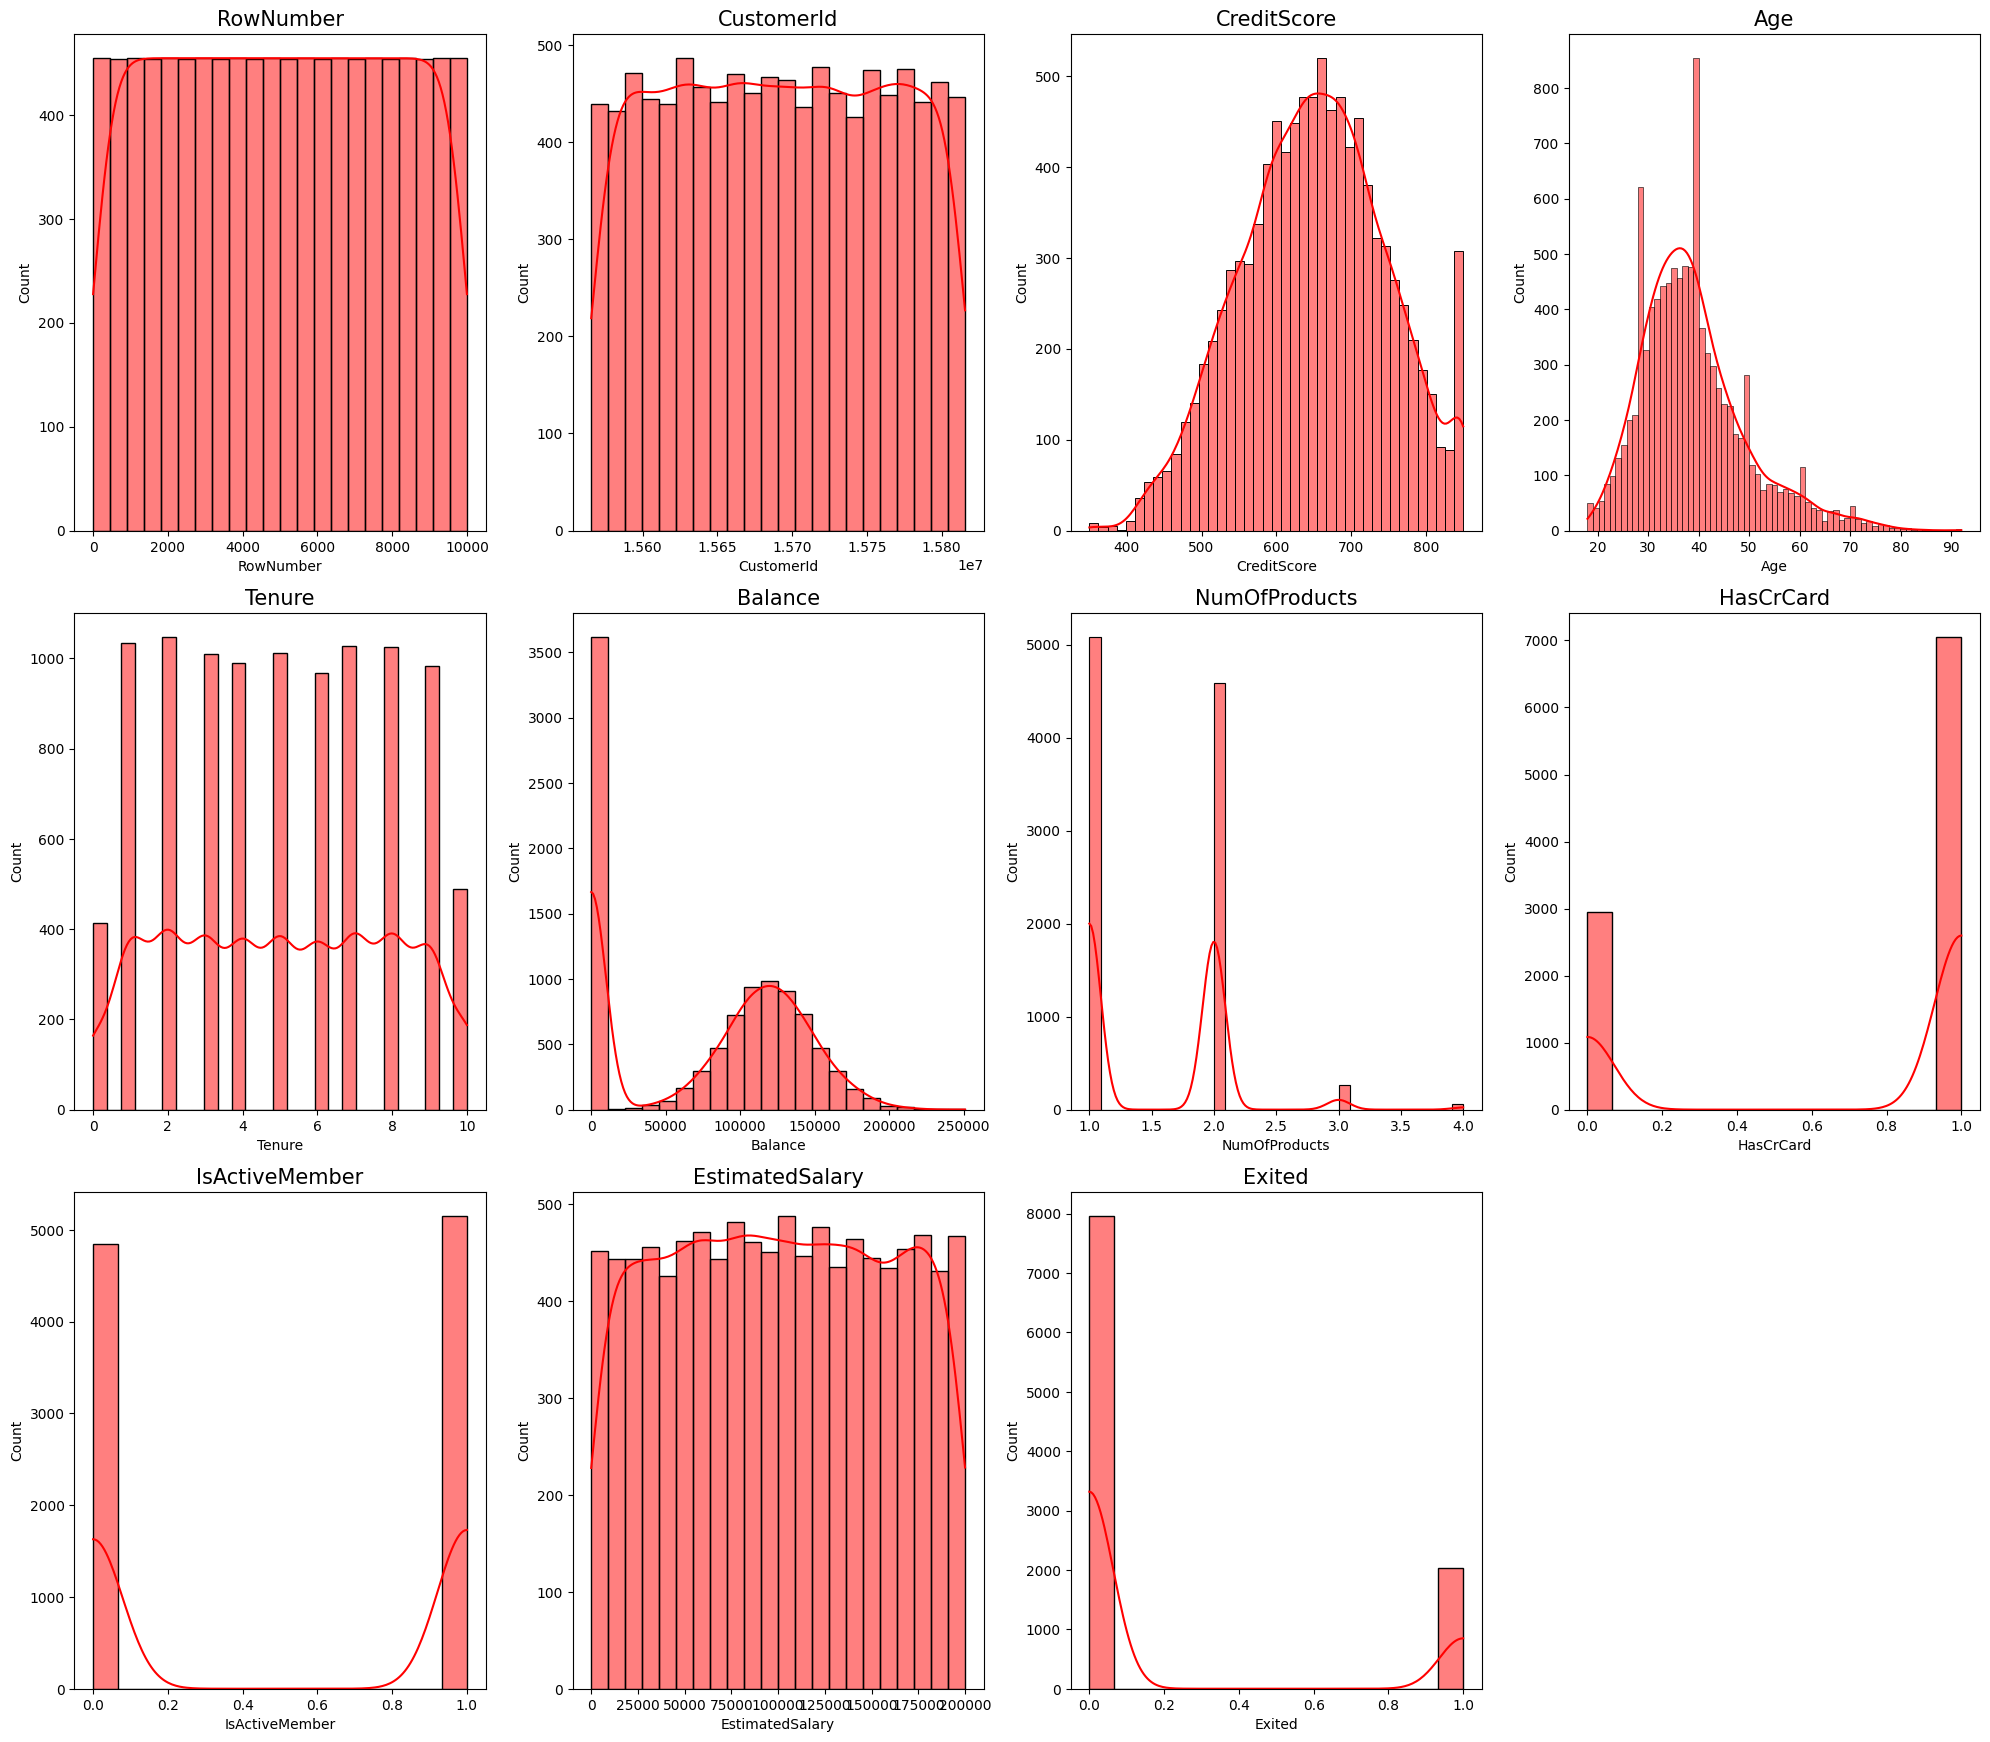

<Figure size 640x480 with 0 Axes>

In [21]:
#viewing all the fields/columns plots together
co_all = cch.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,75))

for i in range(len(co_all)):
    plt.subplot(13, 4, i + 1)
    sns.histplot(cch[co_all[i]], kde=True, color='Red')
    plt.xlabel(co_all[i])
    plt.title(co_all[i], fontsize=15)
    plt.tight_layout()
plt.show()
plt.savefig('all_univariate_analysis.png')

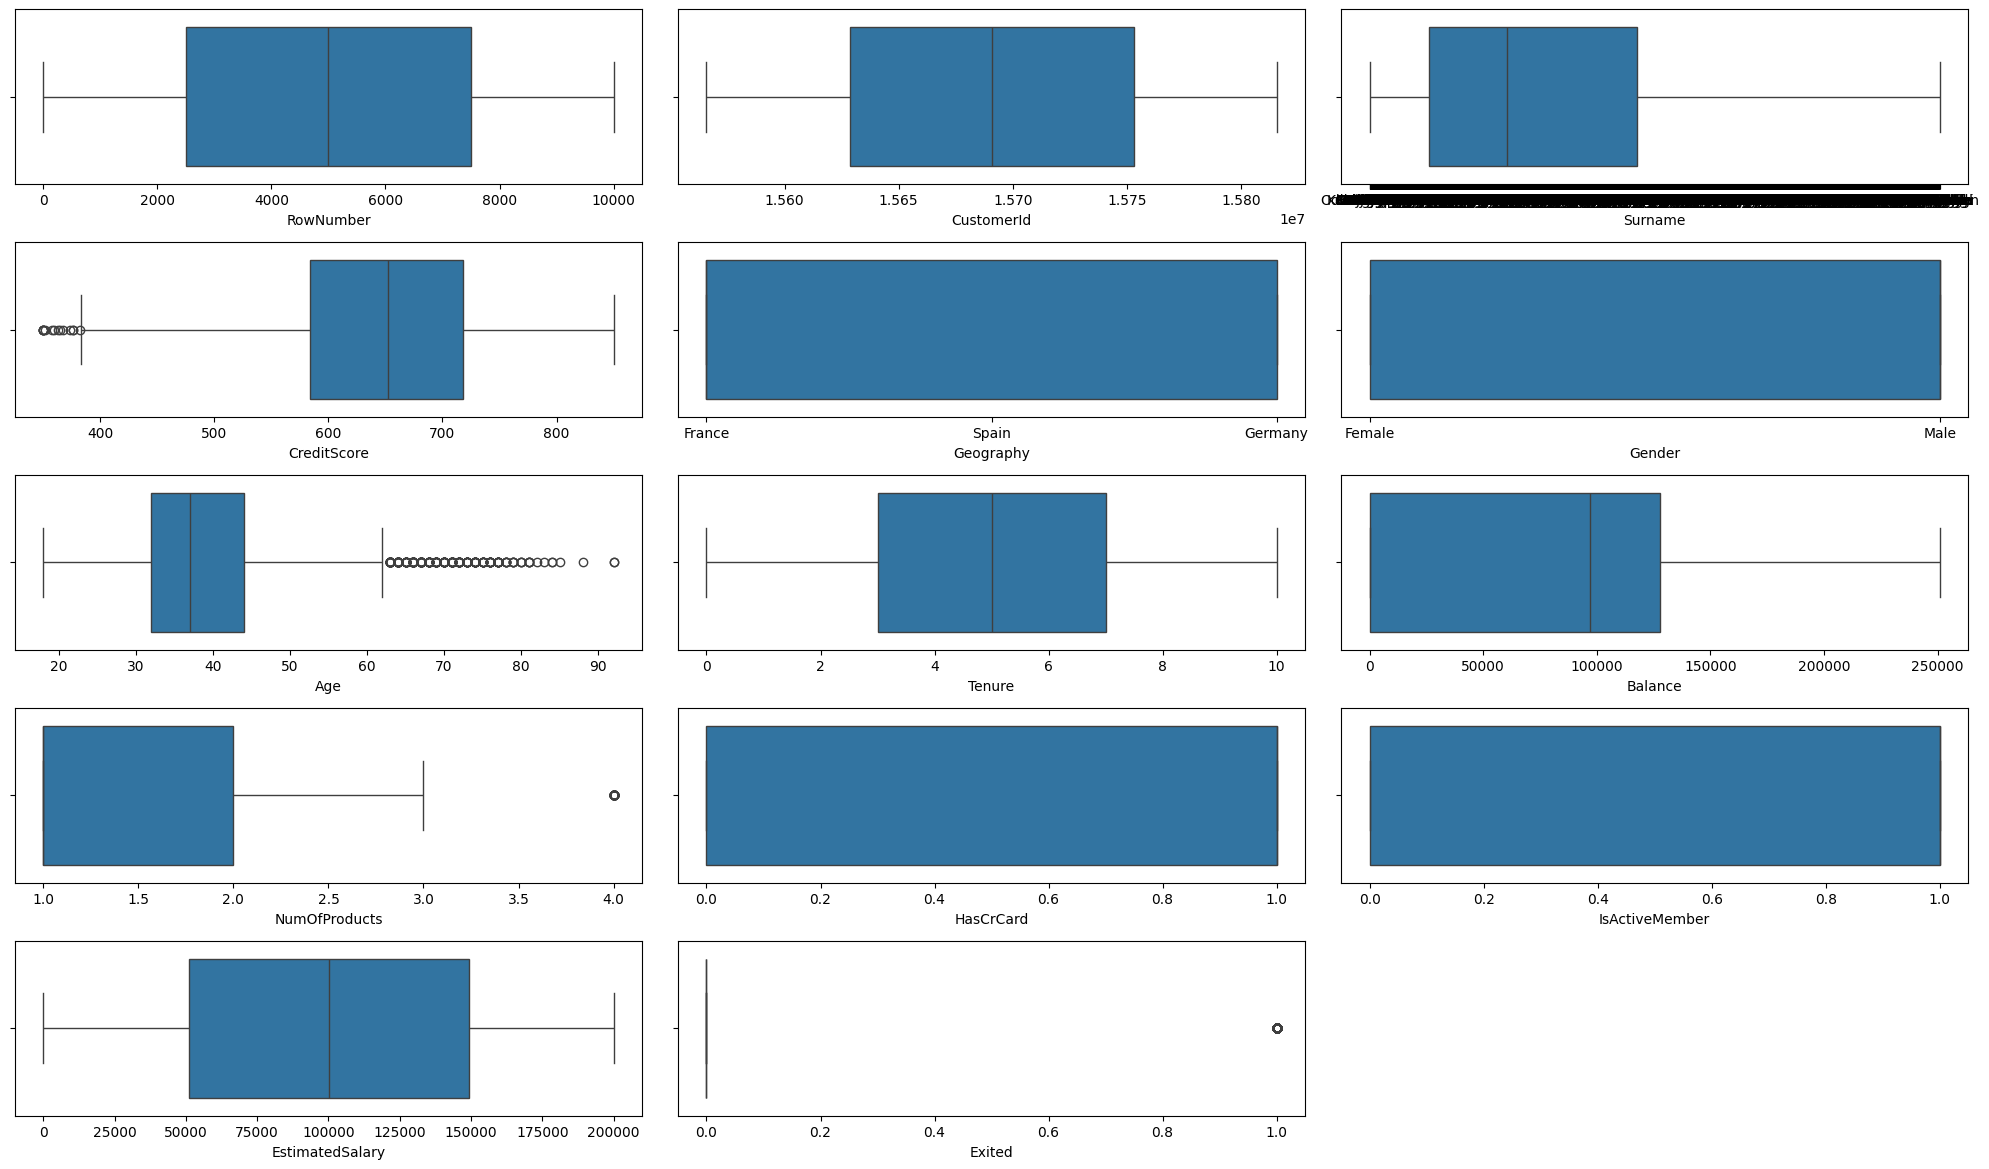

<Figure size 640x480 with 0 Axes>

In [22]:
# boxplot
features = cch.columns.tolist()
plt.figure(figsize=(20,30))
for i, feature in enumerate(features):
    plt.subplot(13,3,i+1)
    sns.boxplot(data= cch, x= feature)
    plt.xlabel(feature)
    plt.tight_layout()
plt.show()
plt.savefig('outlier_detection.png');

### Bivariate Analysis

In [23]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=cch[cch[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=cch[cch[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=cch, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=cch,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


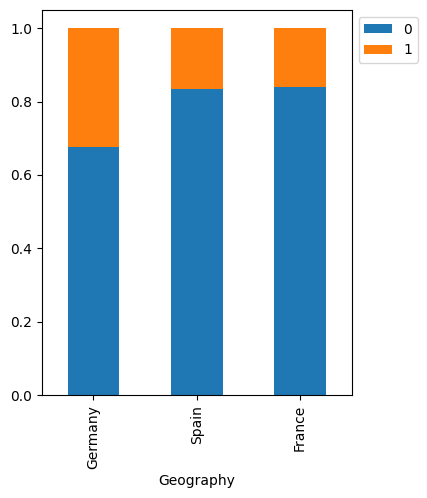

<Figure size 640x480 with 0 Axes>

In [25]:
#Stacked_Barplot between Exited and Geography
stacked_barplot(cch, "Geography", "Exited" )
plt.savefig('Geography_Exited.png')
plt.show();

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


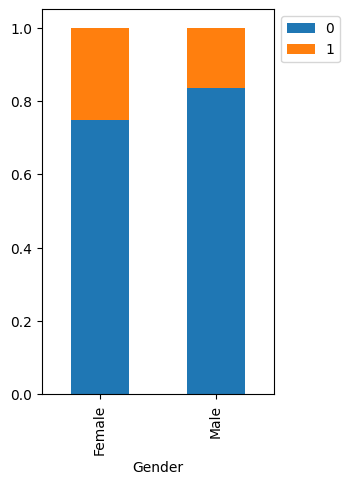

<Figure size 640x480 with 0 Axes>

In [26]:
#Stacked_Barplot between Exited and Gender
stacked_barplot(cch, "Gender", "Exited" )
plt.savefig('Gender_Exited.png')
plt.show();

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


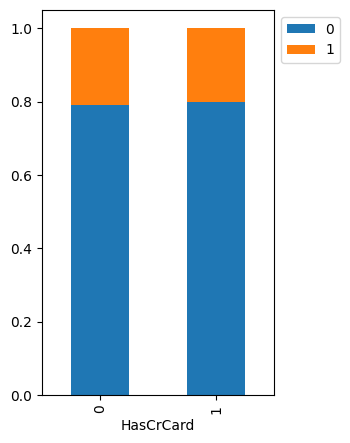

<Figure size 640x480 with 0 Axes>

In [27]:
#Stacked_Barplot between Exited and HasCrCard
stacked_barplot(cch, "HasCrCard", "Exited" )
plt.savefig('HasCrCard_Exited.png')
plt.show();

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


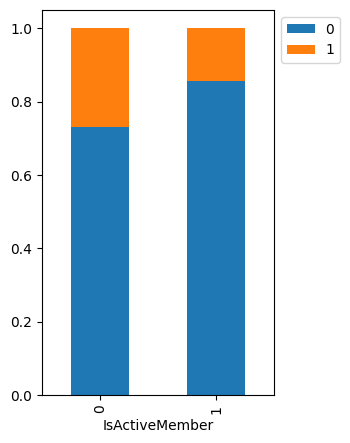

<Figure size 640x480 with 0 Axes>

In [28]:
#Stacked_Barplot between Exited and IsActiveMember
stacked_barplot(cch, "IsActiveMember", "Exited" )
plt.savefig('IsActiveMember_Exited.png')
plt.show();

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


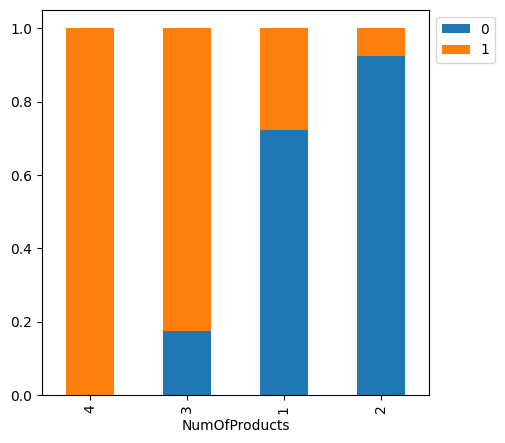

<Figure size 640x480 with 0 Axes>

In [29]:
#Stacked_Barplot between Exited and NumOfProducts
stacked_barplot(cch, "NumOfProducts", "Exited" )
plt.savefig('NumOfProducts_Exited.png')
plt.show();

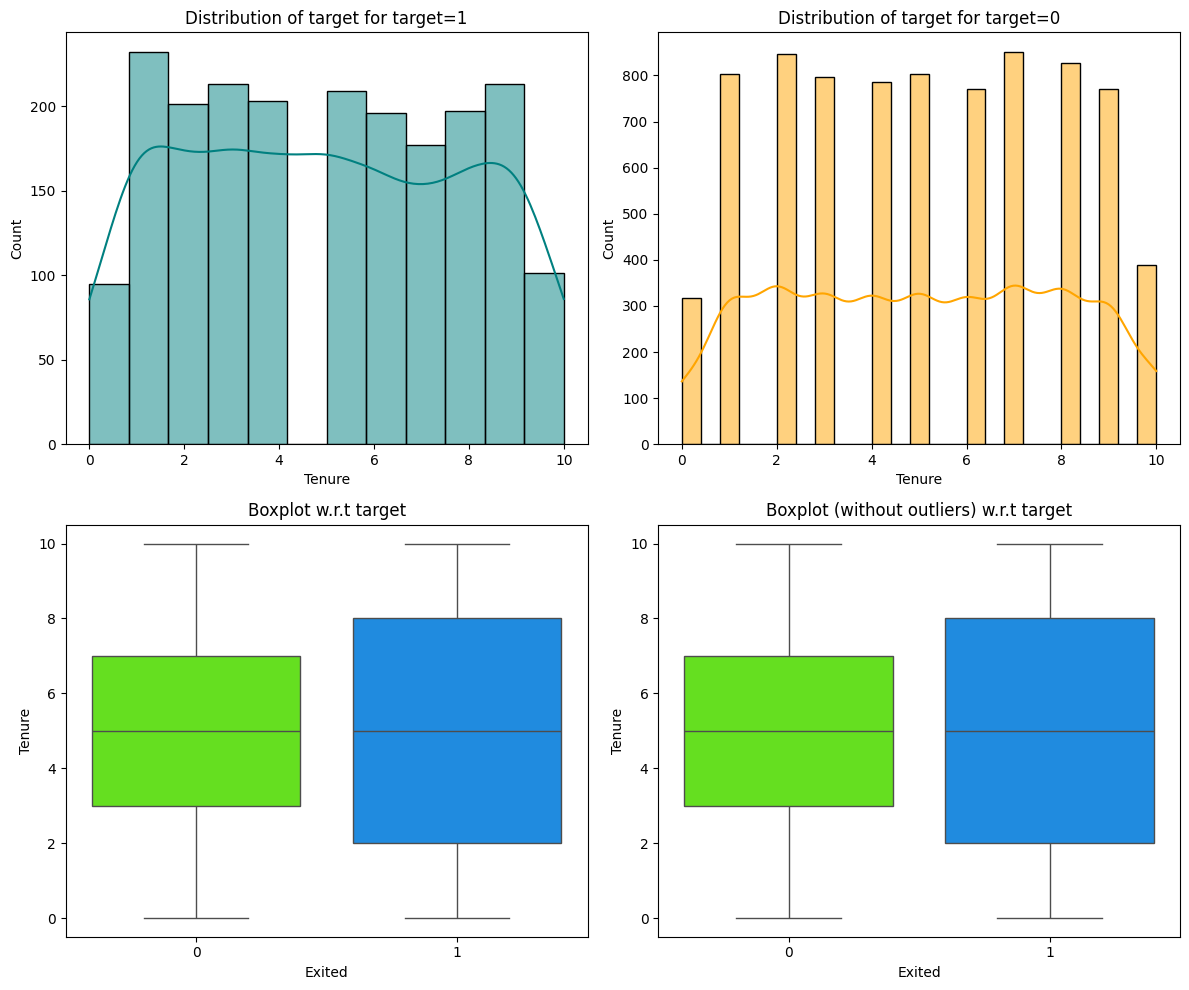

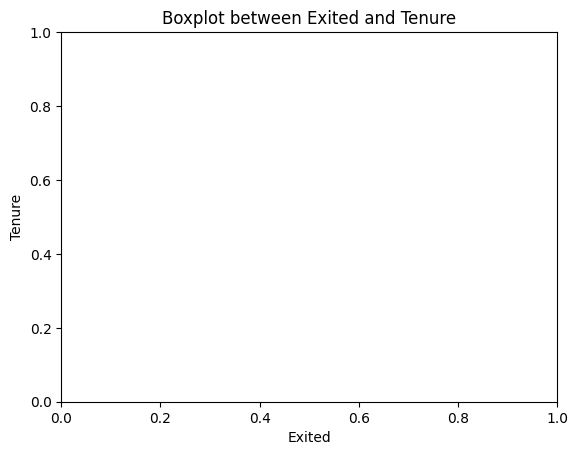

In [30]:
#Boxplot between Exited and Tenure
distribution_plot_wrt_target(cch, "Tenure", "Exited" )
plt.title("Boxplot between Exited and Tenure")
plt.xlabel("Exited")
plt.ylabel("Tenure")
plt.savefig('boxplot_tenure.png')
plt.show();

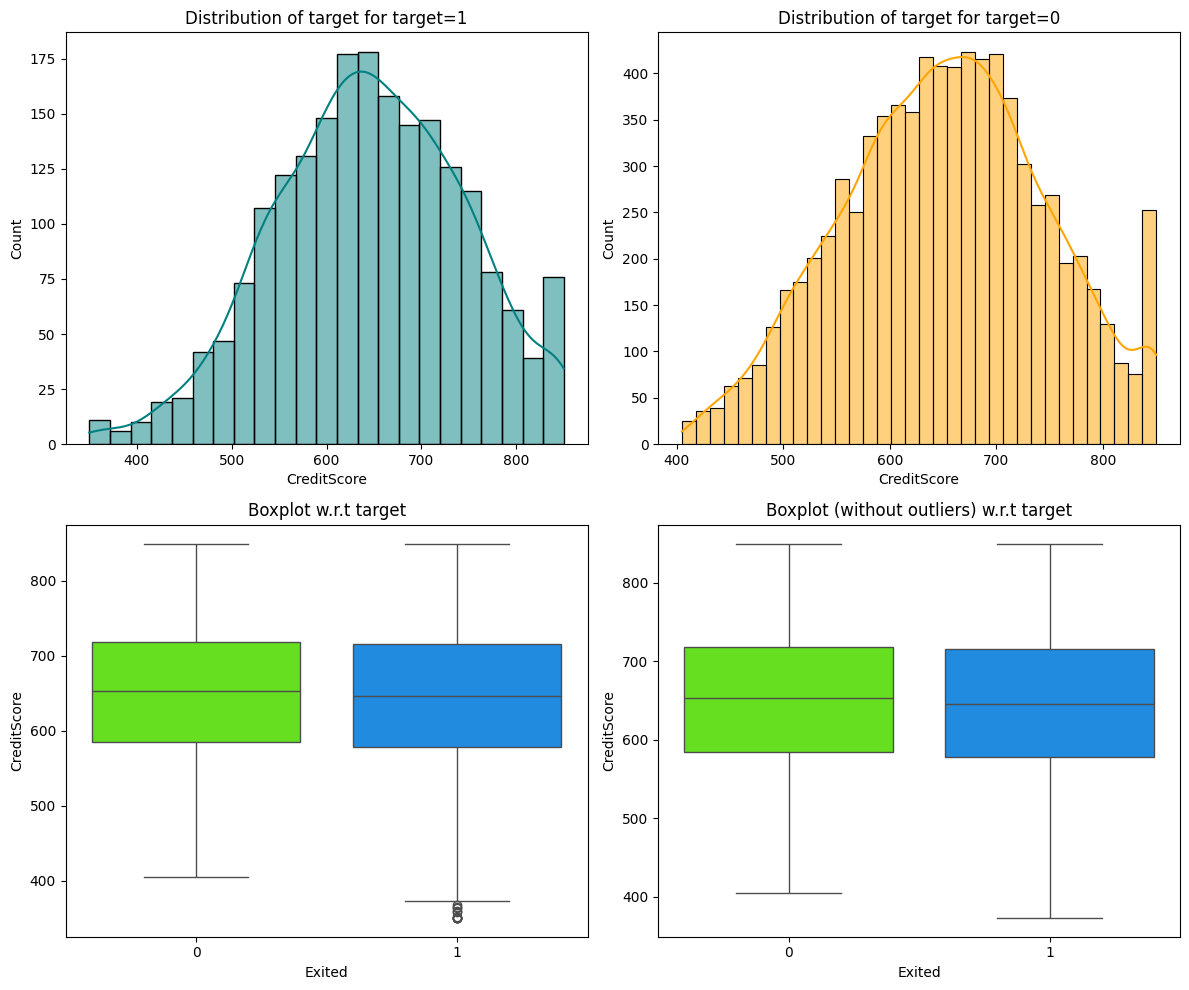

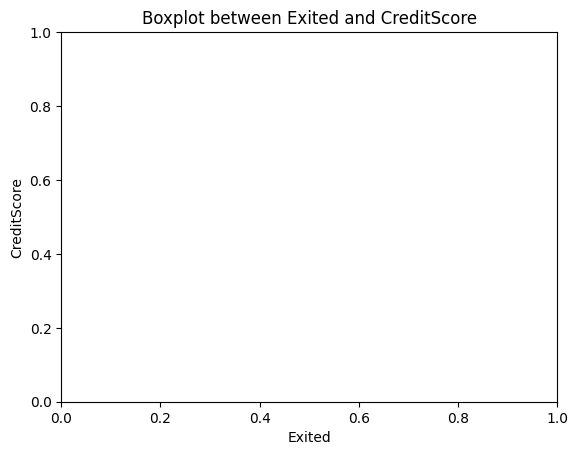

In [31]:
#Boxplot between Exited and CreditScore
distribution_plot_wrt_target(cch, "CreditScore", "Exited" )
plt.title("Boxplot between Exited and CreditScore")
plt.xlabel("Exited")
plt.ylabel("CreditScore")
plt.savefig('boxplot_credit_score.png')
plt.show();

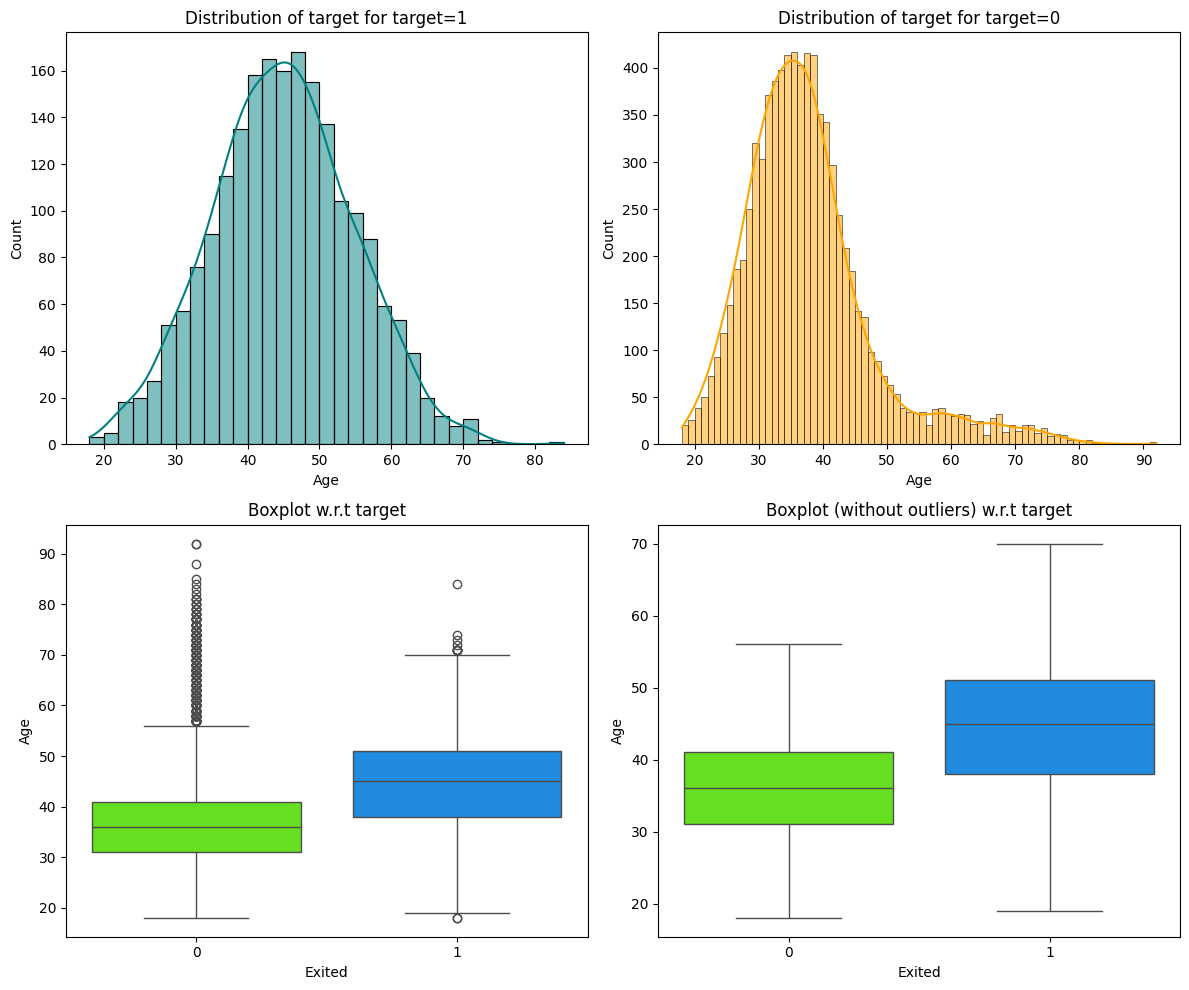

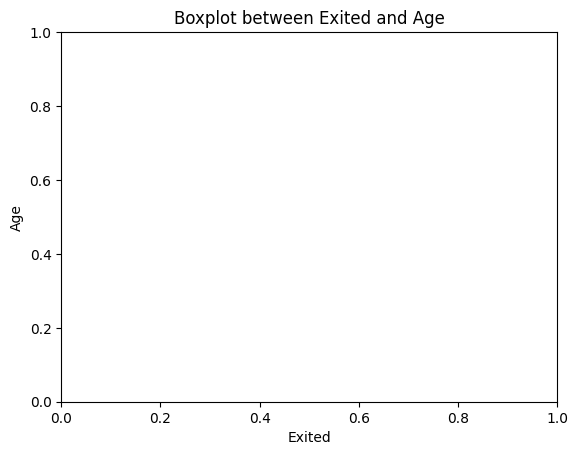

In [32]:
#Boxplot between Exited and Age
distribution_plot_wrt_target(cch, "Age", "Exited" )
plt.title("Boxplot between Exited and Age")
plt.xlabel("Exited")
plt.ylabel("Age")
plt.savefig('boxplot_age.png')
plt.show();

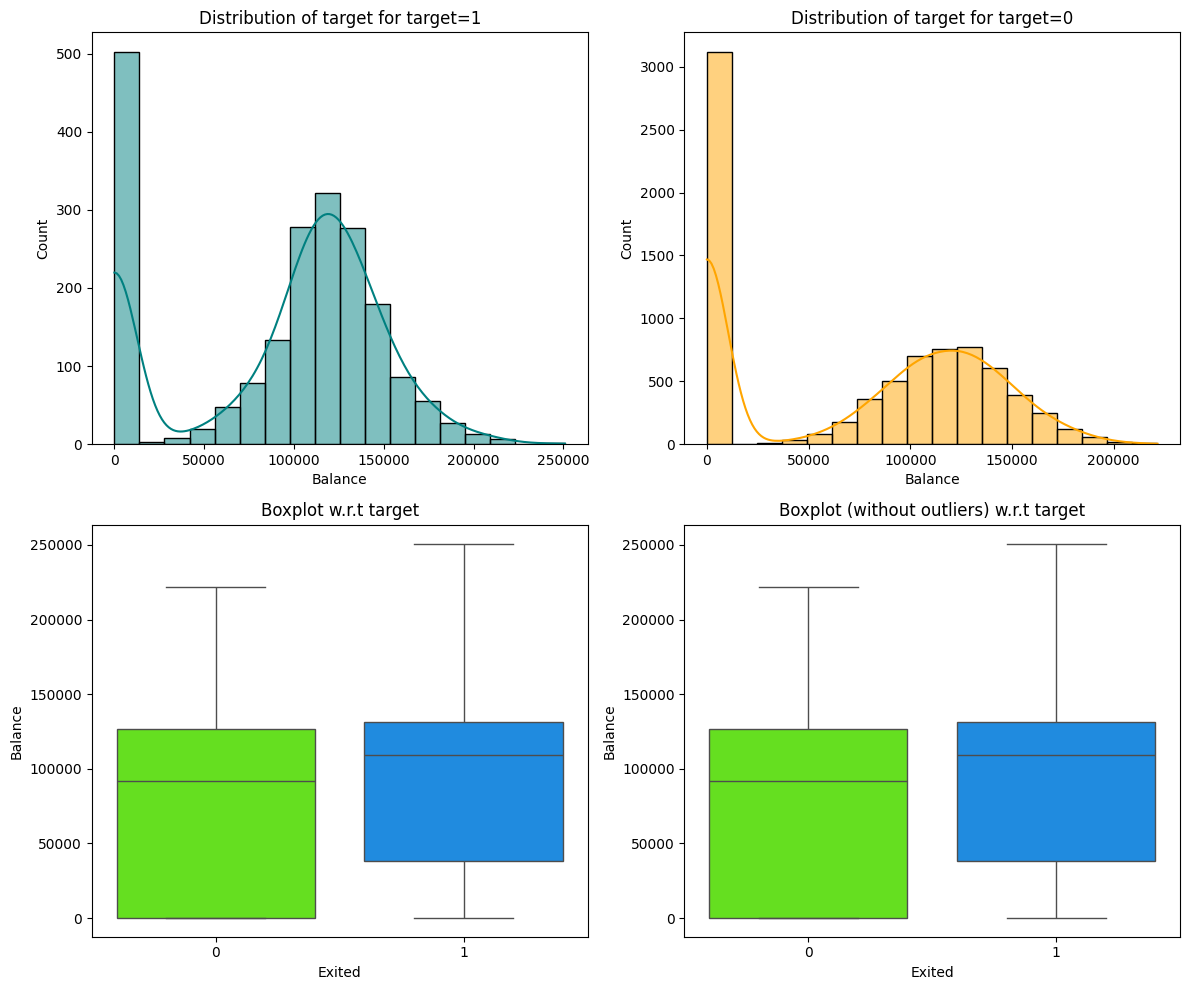

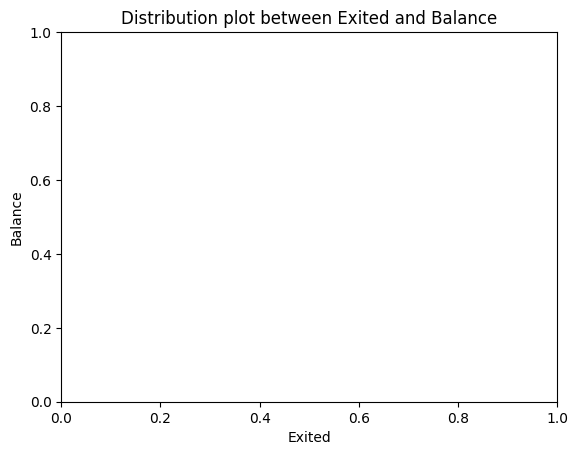

In [33]:
#Distribution plot between Exited and Balance
distribution_plot_wrt_target(cch, "Balance", "Exited" )
plt.title("Distribution plot between Exited and Balance")
plt.xlabel("Exited")
plt.ylabel("Balance")
plt.savefig('distribution_balance.png')
plt.show();

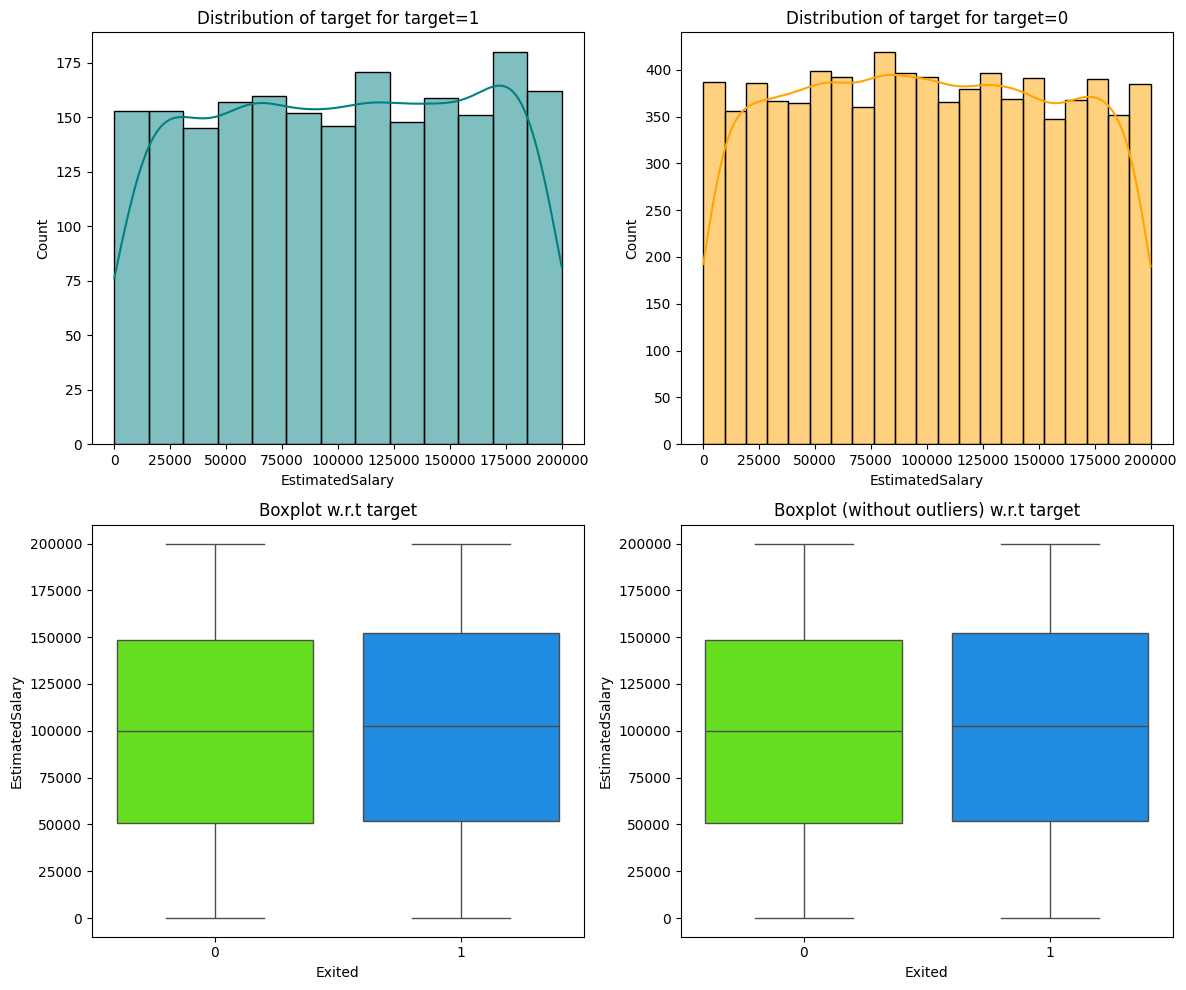

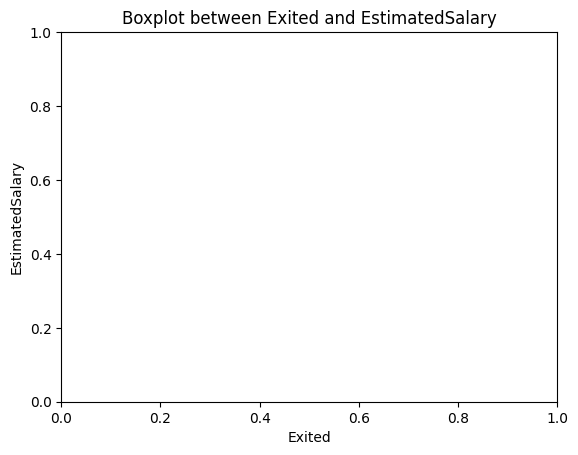

In [34]:
#Boxplot between Exited and EstimatedSalary
distribution_plot_wrt_target(cch, "EstimatedSalary", "Exited" )
plt.title("Boxplot between Exited and EstimatedSalary")
plt.xlabel("Exited")
plt.ylabel("EstimatedSalary")
plt.savefig('boxplot_estimated_salary.png')
plt.show();

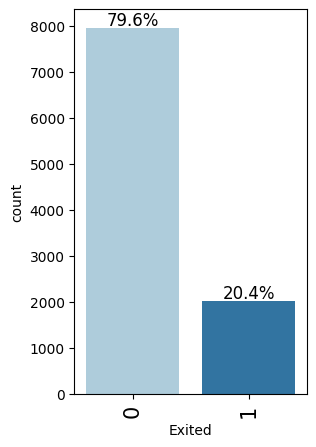

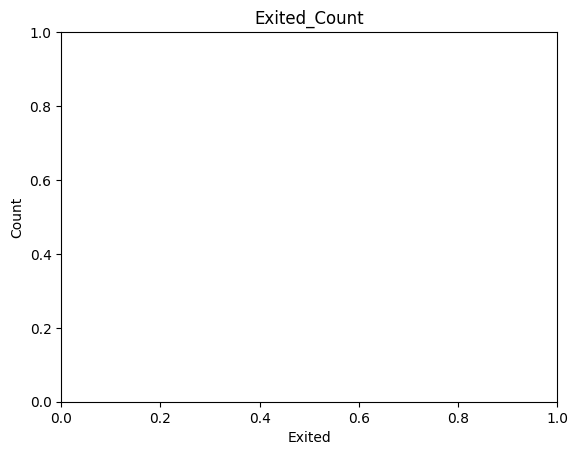

<Figure size 640x480 with 0 Axes>

In [35]:
labeled_barplot(cch, "Exited", perc= True)
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Exited_Count")
plt.savefig('Exited_barplot.png')
plt.show();
plt.savefig('Exited_barplot.png')

###Correlation

In [36]:
corr_cch = cch.copy()

In [37]:
corr_cch = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary" ]

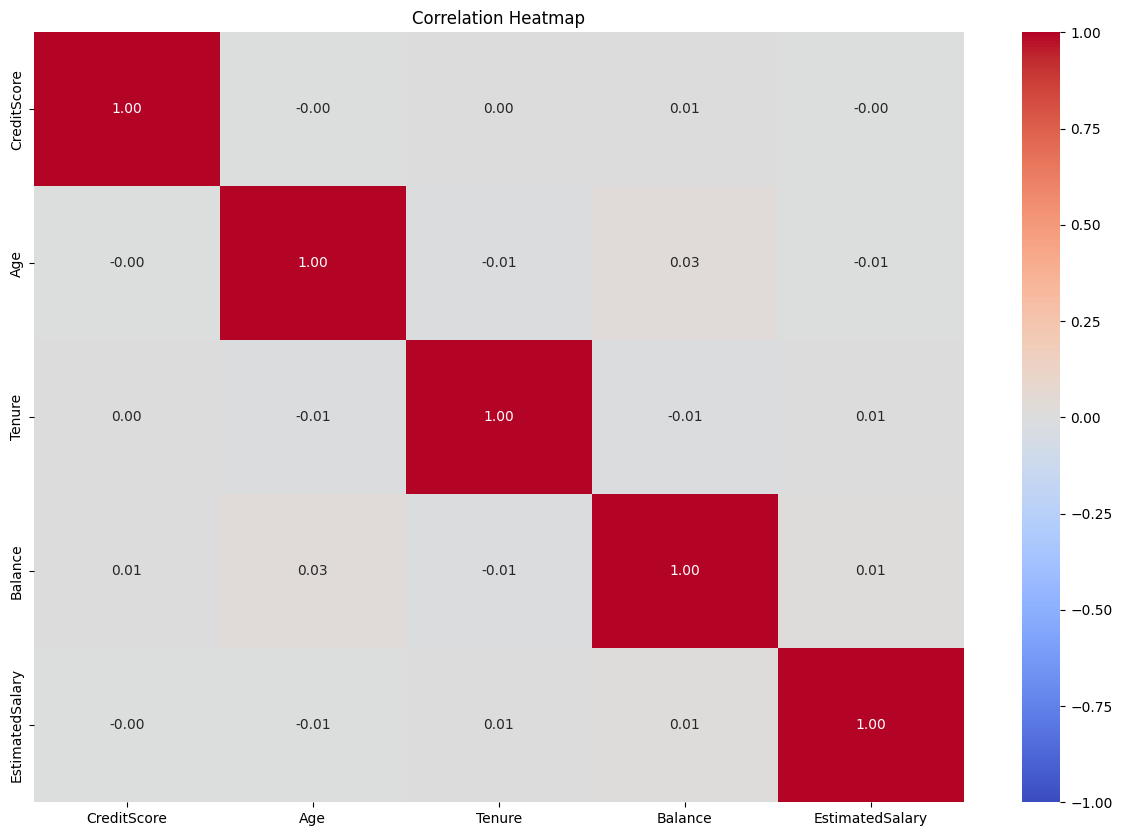

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(cch[corr_cch].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
plt.savefig('correlation_heatmap.png')

###Observations_EDA:

1. CreditScore has some outliers but is normallt distributed.

2. Geography- Germany has the maximum number churns followed by France and then
   Spain.

3. Gender- Females left the bank than male customers.

4. Age- Customers having age of 50-60 mostly churned while it also has some outliers.

5. Tenure of the most of the customers is around 1-9 years.

6. Balance- The data seems left skewed as most of the customers have 0 balance.

7. NumOfProducts- Maximum customers who is using product 2 are staying while customers with product 4 are churned.

8. HasCrCard - around 75% of customers have creditcard.

9. IsActiveMember - this is almost 50-50 ratio, approx. 50% of customers are active customers.

10. EstimatedSalary- is uniformly distributed.

11. Exited - Its 80:20 ratio, 80% customers are staying with bank while 20% left the bank.

**####There is no strong correlation between columns.**

## Data Preprocessing

### Dummy Variable Creation

In [39]:
nu_df = cch.copy()

In [40]:
#drop columns(RowNumber,CustomerId,Surname)
nu_df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [41]:
#dummy (Gender, Geography)
nu_df= pd.get_dummies(nu_df, columns=['Gender', 'Geography'], drop_first=True, dtype=int)

In [42]:
nu_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [43]:
nu_df.shape

(10000, 12)

### Train-validation-test Split

In [44]:
X=nu_df.drop(columns=['Exited'])
y=nu_df['Exited']

In [45]:
X.shape, y.shape

((10000, 11), (10000,))

In [46]:
# Splitting data in train and temporary sets (70:30)
X_large, X_test, y_large, y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Shape of Training set : ", X_large.shape)
print("Shape of Temporary set : ", X_test.shape)

Shape of Training set :  (7000, 11)
Shape of Temporary set :  (3000, 11)


In [47]:
# spliting temp data in validation and test set (75:25)
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size=0.25, random_state=42, stratify=y_large)
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Test set : ", X_test.shape)

Shape of Training set :  (5250, 11)
Shape of Validation set :  (1750, 11)
Shape of Test set :  (3000, 11)


### Data Normalization

In [48]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [49]:
#scaling of selected columns in X_train, X_val, X_test
norm_col=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit only on training data
scaler.fit(X_train[norm_col])

# Transform train, validation, and test sets
X_train[norm_col] = scaler.transform(X_train[norm_col])
X_val[norm_col] = scaler.transform(X_val[norm_col])
X_test[norm_col] = scaler.transform(X_test[norm_col])

In [50]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
294,0.314074,-0.080342,-0.700772,-1.223658,0.795596,1,1,0.221166,1,0,0
5175,0.500576,-0.939002,1.378180,0.817047,0.795596,1,0,1.129937,0,0,1
5244,0.220823,0.396692,-0.007788,-1.223658,0.795596,1,1,-0.613039,1,0,1
5761,0.614550,-0.748189,-0.700772,-1.223658,0.795596,1,1,0.217638,0,0,0
9447,0.697440,0.205879,-1.393756,-1.223658,0.795596,0,1,-1.256492,0,0,0


## All good now we can proceed for model building with new scaled data (X_train).

## Model Building

### Model Evaluation Criterion

1. This is a classification problem because here, goal is to predict whether a
   customer will leave the bank (churn = 1) or stay (churn = 0).

2. Choosing the right evaluation metric relies upon the business effect of
   False positives (FP) and False negatives (FN).


3.  Which error is worse?

(i) False Negatives (FN) are worse than False Positives (FP)
If a customer actually churns (1) but is predicted as no churn (0) (FN), the bank loses the customer and revenue.

(ii) If a customer is wrongly flagged as churner (FP), the bank may waste some retention resources (but its less costly than losing a real customer).


1. Metric functions defined in sklearn for accuracy, F1 score, Recall,
   precision,roc_auc scores.
    Here, we will use Recall, to reduce chances of minimizing False Negatives(FN)
2. Create a function which will print out all metrics in one go.
3. We will also creating a dataframe for storing the results from the built
   models.


In [168]:
# Define Model Evaluation Function
def evaluate_model(model, X_train, y_train):
    """
    Evaluates the trained model on test data.

    Parameters:
    - model: Trained Keras model
    - X_train, y_train: Test dataset

    Returns:
    - None (Prints classification report and recall score)
    """
    # Predict probabilities and convert to binary values
    y_train_pred = model.predict(X_train)
    y_train_pred = (y_train_pred > 0.5).astype(int)

    # Calculate and print Recall
    recall = recall_score(y_train, y_pred)
    print(f"Train Recall: {recall:.4f}")

    # Print classification report
    print(classification_report(y_train, y_pred))

In [169]:
# creating create two blank dataframes that will store the recall values for all the built models.
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

In [170]:
# create a function for plotting the confusion matrix
def make_confusion_matrix(model_0, y_train, y_train_pred):
    """
    To plot the confusion_matrix with percentages

    Parameters:
    - model_0: Trained Keras model
    - y_train, y_train_pred: Test dataset

    Returns:
    - None (Prints classification report and recall score)
    """
    # Calculate and print Recall
    recall = recall_score(y_train, y_train_pred)
    print(f"Train Recall: {recall:.4f}")

    cm = confusion_matrix(y_train, y_train_pred)
    cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]  # normalize confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        cm_norm,
        annot=True,
        cmap="Blues",
        fmt=".2f",
        xticklabels=["No Churn", "Churn"],
        yticklabels=["No Churn", "Churn"],
    )

In [171]:
def plot(history, name):
    """
    Plots training and validation metrics from history.

    Parameters:
    - history: Model training history object from model.fit()
    - name: Metric to plot ('loss' or 'recall')
    """
    fig = plt.figure(figsize=(8, 5))

    plt.plot(history.history[name], label='Train')
    plt.plot(history.history['val_' + name], label='Validation')

    plt.title('Model ' + name.capitalize())  # Plot title
    plt.ylabel(name.capitalize())  # Y-axis label
    plt.xlabel('Epochs')  # X-axis label
    plt.legend(['Train', 'Validation'], loc='upper right')  # Legend
    plt.show()


In [172]:
columns = ["Model_name", "#I/P layers", "#hidden layer", "#O/P layer", "activation function", "#epoch", "#batch size", "optimizer", "time(secs)", "Train_loss", "Train_recall", "Val_loss", "Val_recall" ]
results = pd.DataFrame(columns=columns)

###Model_0 (Neural Network with SGD Optimizer)
    1- I/P layer with 32 neurons with relu activation function
    1- Hidden layer with 16 neurons with relu activation function
    1- O/P layer with sigmoid activation function
    optimizer- SGD
    Bath Size =32
    Epoch =10

In [56]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [57]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [58]:
model_0 = Sequential() # Intialize NN
model_0.add(Dense(32, activation = 'relu', input_dim=X_train.shape[1])) # I/P layer with 32 neurons
model_0.add(Dense(16, activation = 'relu')) # Hidden layer with 16 neurons
model_0.add(Dense(1, activation = 'sigmoid')) # O/P layer with 1 neuron
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
#Optimizer(SGD)
optimizer= keras.optimizers.SGD(learning_rate=0.01)
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = [keras.metrics.Recall()], run_eagerly=True)

In [60]:
start= time.time()
history_0 = model_0.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))# fitting NN with epoch=10, and batch size=32
end= time.time()
model_0.summary()

Epoch 1/10
165/165 [==============================] - 7s 40ms/step - loss: 0.5310 - recall: 0.0477 - val_loss: 0.4963 - val_recall: 0.0016
Epoch 2/10
165/165 [==============================] - 6s 34ms/step - loss: 0.4841 - recall: 0.0028 - val_loss: 0.4733 - val_recall: 0.0033
Epoch 3/10
165/165 [==============================] - 5s 32ms/step - loss: 0.4694 - recall: 0.0084 - val_loss: 0.4569 - val_recall: 0.0082
Epoch 4/10
165/165 [==============================] - 7s 40ms/step - loss: 0.4585 - recall: 0.0150 - val_loss: 0.4445 - val_recall: 0.0147
Epoch 5/10
165/165 [==============================] - 5s 33ms/step - loss: 0.4500 - recall: 0.0243 - val_loss: 0.4344 - val_recall: 0.0295
Epoch 6/10
165/165 [==============================] - 6s 39ms/step - loss: 0.4428 - recall: 0.0402 - val_loss: 0.4260 - val_recall: 0.0638
Epoch 7/10
165/165 [==============================] - 5s 31ms/step - loss: 0.4366 - recall: 0.0692 - val_loss: 0.4186 - val_recall: 0.0786
Epoch 8/10
165/165 [=======

In [61]:
print("Time taken in sec:", end - start)

Time taken in sec: 82.00603151321411


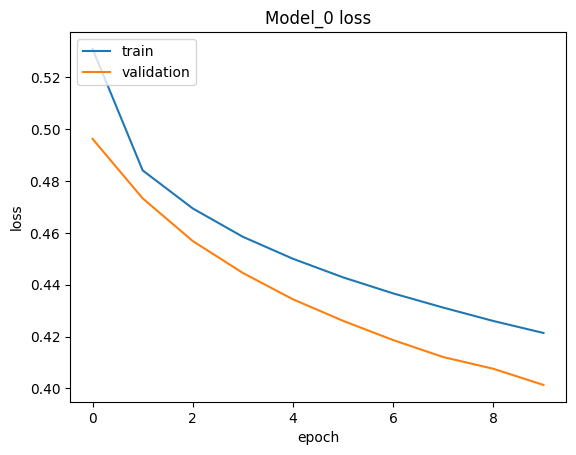

In [62]:
# Loss(Tain & Validation)
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('Model_0 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

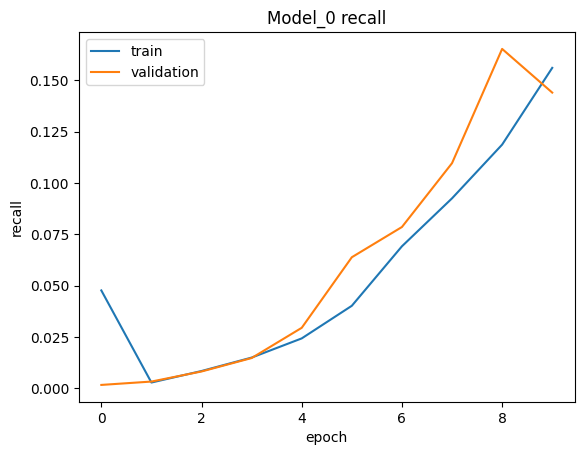

In [63]:
# Recall_Train & Validation
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('Model_0 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [64]:
#predict result using 0.5 as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_train_pred

165/165 [==============================] - 1s 4ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [65]:
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)
y_val_pred

55/55 [==============================] - 0s 5ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [66]:
model_0 = "SGD + sigmoid"
train_metric_df.loc[model_0] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_0] = recall_score(y_val, y_val_pred)

In [67]:
cr_m0 = classification_report(y_train, y_train_pred)
print(cr_m0)

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4180
           1       0.82      0.15      0.26      1070

    accuracy                           0.82      5250
   macro avg       0.82      0.57      0.58      5250
weighted avg       0.82      0.82      0.77      5250



In [68]:
cr_m0val = classification_report(y_val, y_val_pred)
print(cr_m0val)

              precision    recall  f1-score   support

           0       0.82      0.99      0.89      1394
           1       0.73      0.15      0.25       356

    accuracy                           0.82      1750
   macro avg       0.77      0.57      0.57      1750
weighted avg       0.80      0.82      0.76      1750



Train Recall: 0.1533


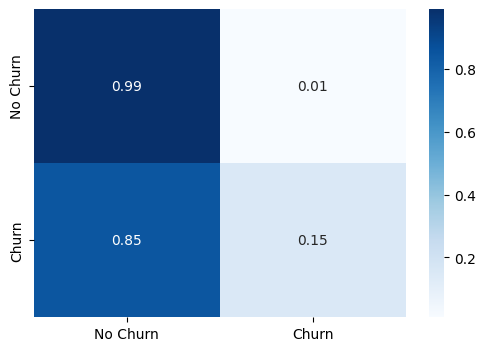

In [69]:
make_confusion_matrix(model_0, y_train, y_train_pred)

Train Recall: 0.1489


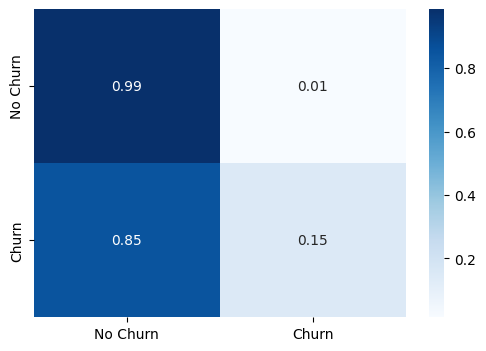

In [70]:
make_confusion_matrix(model_0, y_val, y_val_pred)

In [104]:
results.loc[0] = ['Model_0', 1, 1, 1, 'sigmoid', 10, 32, 'SGD', 82.006, 0.4214, 0.1561, 0.4013, 0.1440]
results

,Model_name,#I/P layers,#hidden layer,#O/P layer,activation function,#epoch,#batch size,optimizer,time(secs),Train_loss,Train_recall,Val_loss,Val_recall
0,Model_0,1,1,1,sigmoid,10,32,SGD,82.006,0.4214,0.1561,0.4013,0.1440
1,Model_1,1,1,1,sigmoid,100,32,Adam,1778.227,0.2275,0.6569,0.4160,0.5758
2,Model_2,1,3,1,relu + Dropout + sigmoid,100,32,Adam,1944.840,0.1392,0.8376,0.7793,0.5730


### Model_1 (Neural Network with Adam Optimizer)
    1- I/P layer with 64 neurons with relu activation function
    1- Hidden layer with 32 neurons with relu activation function
    1- O/P layer with sigmoid activation function
    optimizer- Adam
    Epoch = 100
    batch size =32


In [72]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [73]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [74]:
model_1 = Sequential() # Intialize NN
model_1.add(Dense(64, activation = 'relu', input_dim=X_train.shape[1])) # I/P layer with 64 neurons
model_1.add(Dense(32, activation = 'relu')) # Hidden layer with 32 neurons
model_1.add(Dense(1, activation = 'sigmoid')) # O/P layer with 1 neuron
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
#Optimizer- Adam
optimizer= keras.optimizers.Adam()
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = [keras.metrics.Recall()], run_eagerly=True)

In [76]:
start= time.time()
history_1 = model_1.fit(X_train, y_train, epochs =100, batch_size =32, validation_data= (X_val, y_val))
end= time.time()
model_1.summary()

Epoch 1/100
165/165 [==============================] - 7s 43ms/step - loss: 0.4833 - recall: 0.0607 - val_loss: 0.4167 - val_recall: 0.1489
Epoch 2/100
165/165 [==============================] - 6s 36ms/step - loss: 0.4063 - recall: 0.2570 - val_loss: 0.3777 - val_recall: 0.4466
Epoch 3/100
165/165 [==============================] - 7s 43ms/step - loss: 0.3770 - recall: 0.3822 - val_loss: 0.3563 - val_recall: 0.4157
Epoch 4/100
165/165 [==============================] - 6s 37ms/step - loss: 0.3625 - recall: 0.4252 - val_loss: 0.3504 - val_recall: 0.4635
Epoch 5/100
165/165 [==============================] - 7s 41ms/step - loss: 0.3554 - recall: 0.4299 - val_loss: 0.3422 - val_recall: 0.4775
Epoch 6/100
165/165 [==============================] - 7s 41ms/step - loss: 0.3511 - recall: 0.4467 - val_loss: 0.3483 - val_recall: 0.5309
Epoch 7/100
165/165 [==============================] - 7s 41ms/step - loss: 0.3483 - recall: 0.4477 - val_loss: 0.3452 - val_recall: 0.5393
Epoch 8/100
165/165 

In [77]:
print("Time taken in sec:", end - start)

Time taken in sec: 742.0168631076813


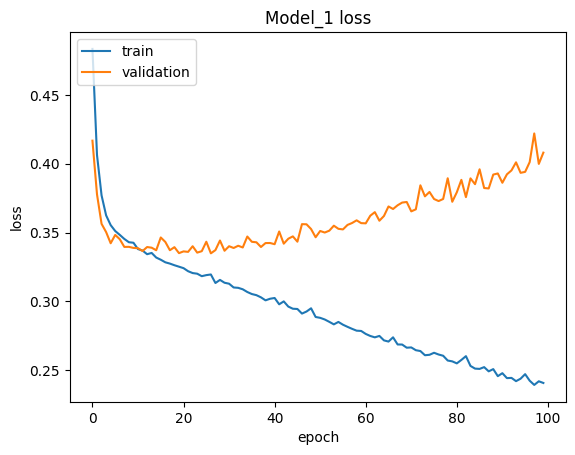

In [78]:
# Loss(Tain & Validation)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model_1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

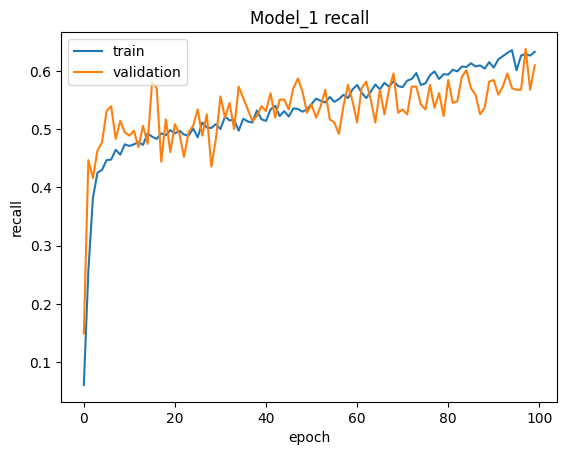

In [79]:
# Recall_Train & Validation
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('Model_1 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [80]:
#predict result using 0.5 as a threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_train_pred

165/165 [==============================] - 1s 4ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [81]:
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)
y_val_pred

55/55 [==============================] - 0s 4ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [82]:
model_1 = "Adam + relu"
train_metric_df.loc[model_1] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_1] = recall_score(y_val, y_val_pred)

In [83]:
cr_m1 = classification_report(y_train, y_train_pred)
print(cr_m1)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      4180
           1       0.81      0.71      0.76      1070

    accuracy                           0.91      5250
   macro avg       0.87      0.83      0.85      5250
weighted avg       0.90      0.91      0.91      5250



In [84]:
cr_m1val = classification_report(y_val, y_val_pred)
print(cr_m1val)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1394
           1       0.60      0.61      0.61       356

    accuracy                           0.84      1750
   macro avg       0.75      0.75      0.75      1750
weighted avg       0.84      0.84      0.84      1750



Train Recall: 0.7103


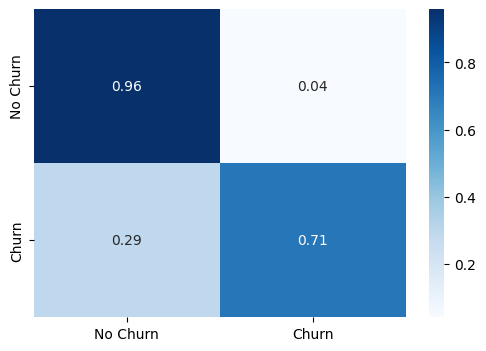

In [85]:
make_confusion_matrix(model_1, y_train, y_train_pred)

Train Recall: 0.6096


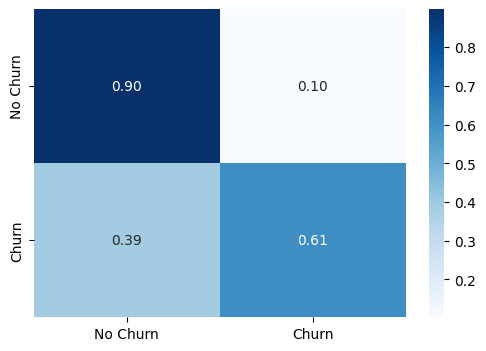

In [86]:
make_confusion_matrix(model_1, y_val, y_val_pred)

In [105]:
results.loc[1] = ['Model_1', 1, 1, 1, 'sigmoid', 100, 32, 'Adam', 742.016, 0.2408, 0.6327, 0.4080, 0.6096]
results

,Model_name,#I/P layers,#hidden layer,#O/P layer,activation function,#epoch,#batch size,optimizer,time(secs),Train_loss,Train_recall,Val_loss,Val_recall
0,Model_0,1,1,1,sigmoid,10,32,SGD,82.006,0.4214,0.1561,0.4013,0.1440
1,Model_1,1,1,1,sigmoid,100,32,Adam,742.016,0.2408,0.6327,0.4080,0.6096
2,Model_2,1,3,1,relu + Dropout + sigmoid,100,32,Adam,1944.840,0.1392,0.8376,0.7793,0.5730


### Model_2 (Neural Network with Adam Optimizer + Dropout)
    1- Hidden layer with 32 neurons with relu activation function
    1- Hidden layer with 16 neurons with relu activation function
    1- O/P layer with sigmoid activation function
    Dropout added
    optimizer- Adam
    Epoch = 50
    batch size =32

In [88]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [89]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [90]:
  # Intialize NN
  model_2 = Sequential()
  model_2.add(Dense(32, activation = 'relu', input_dim=X_train.shape[1])) # I/P layer with 64 neurons
  model_2.add(Dense(16, activation = 'relu')) # Hidden layer with 16 neurons
  model_2.add(Dropout(0.2))# Dropout to prevent overfitting
  model_2.add(Dense(1, activation = 'sigmoid')) # O/P layer with 1 neuron
  model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929 (3.63 KB)
Trainable params: 929 (3.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
#optimizer = Adam
optimizer= keras.optimizers.Adam()
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = [keras.metrics.Recall()], run_eagerly=True)

In [92]:
start= time.time()
history_2 = model_2.fit(X_train, y_train, epochs =50, batch_size =32, validation_data= (X_val, y_val))
end= time.time()
model_2.summary()

Epoch 1/50
165/165 [==============================] - 7s 42ms/step - loss: 0.5188 - recall: 0.0514 - val_loss: 0.4436 - val_recall: 0.0927
Epoch 2/50
165/165 [==============================] - 7s 44ms/step - loss: 0.4489 - recall: 0.1879 - val_loss: 0.4179 - val_recall: 0.2107
Epoch 3/50
165/165 [==============================] - 7s 40ms/step - loss: 0.4283 - recall: 0.2234 - val_loss: 0.4012 - val_recall: 0.2893
Epoch 4/50
165/165 [==============================] - 7s 43ms/step - loss: 0.4120 - recall: 0.2935 - val_loss: 0.3867 - val_recall: 0.3596
Epoch 5/50
165/165 [==============================] - 7s 41ms/step - loss: 0.3909 - recall: 0.3411 - val_loss: 0.3681 - val_recall: 0.3736
Epoch 6/50
165/165 [==============================] - 7s 42ms/step - loss: 0.3828 - recall: 0.3785 - val_loss: 0.3641 - val_recall: 0.4551
Epoch 7/50
165/165 [==============================] - 7s 42ms/step - loss: 0.3755 - recall: 0.3953 - val_loss: 0.3590 - val_recall: 0.4719
Epoch 8/50
165/165 [=======

In [93]:
print("Time taken in sec:", end - start)

Time taken in sec: 380.108145236969


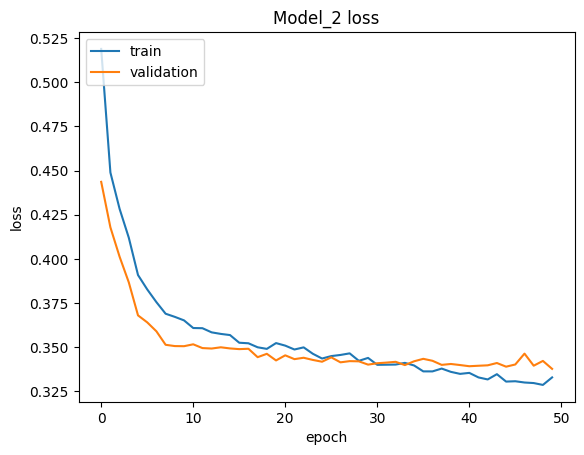

In [94]:
# Loss(Train & Validation)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model_2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

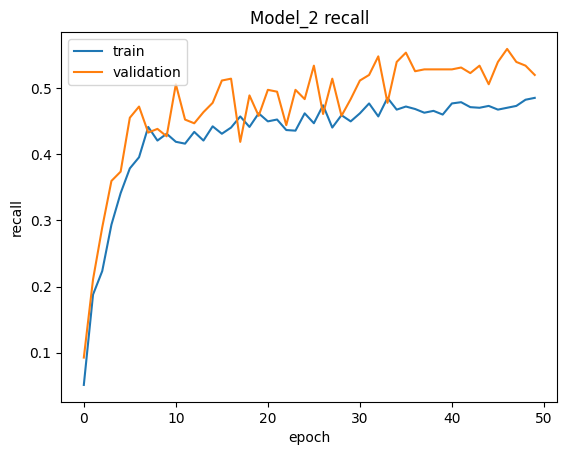

In [95]:
# Recall_Train & Validation
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('Model_2 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [96]:
#predict result using 0.5 as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_train_pred

165/165 [==============================] - 1s 6ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [97]:
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)
y_val_pred

55/55 [==============================] - 0s 6ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [98]:
model_2 = "Adam + relu"
train_metric_df.loc[model_2] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_2] = recall_score(y_val, y_val_pred)

In [99]:
cr_m2 = classification_report(y_train, y_train_pred)
print(cr_m2)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4180
           1       0.80      0.49      0.61      1070

    accuracy                           0.87      5250
   macro avg       0.84      0.73      0.77      5250
weighted avg       0.87      0.87      0.86      5250



In [100]:
cm_m2val = classification_report(y_val, y_val_pred)
print(cm_m2val)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1394
           1       0.71      0.52      0.60       356

    accuracy                           0.86      1750
   macro avg       0.80      0.73      0.76      1750
weighted avg       0.85      0.86      0.85      1750



Train Recall: 0.4916


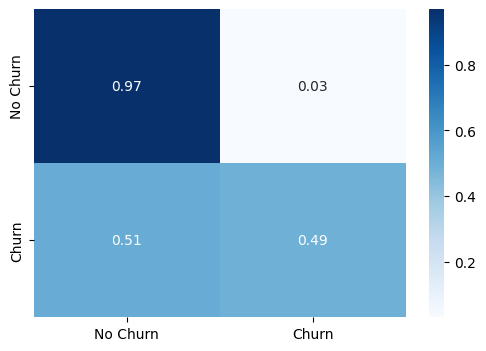

In [101]:
make_confusion_matrix(model_2, y_train, y_train_pred)

Train Recall: 0.5197


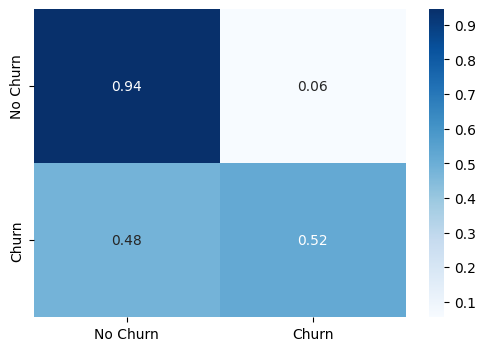

In [102]:
make_confusion_matrix(model_2, y_val, y_val_pred)

In [106]:
results.loc[2] = ['Model_2', 1, 3, 1, 'relu + Dropout + sigmoid', 50, 32, 'Adam', 380.108, 0.3330, 0.4850, 0.3378, 0.5197]
results

,Model_name,#I/P layers,#hidden layer,#O/P layer,activation function,#epoch,#batch size,optimizer,time(secs),Train_loss,Train_recall,Val_loss,Val_recall
0,Model_0,1,1,1,sigmoid,10,32,SGD,82.006,0.4214,0.1561,0.4013,0.1440
1,Model_1,1,1,1,sigmoid,100,32,Adam,742.016,0.2408,0.6327,0.4080,0.6096
2,Model_2,1,3,1,relu + Dropout + sigmoid,50,32,Adam,380.108,0.3330,0.4850,0.3378,0.5197


### Model_3 (Neural Network with Adam Optimizer + 2 Dropout)
    1- I/P layer with 32 neurons with relu activation function
    1- Hidden layer with 16 neurons with relu activation function
    1- Hidden layer with 8 neurons with relu activation function
    1- O/P layer with sigmoid activation function
    Dropout added after 1st hidden layers and 2nd again after another 2 hidden layers
    optimizer- Adam
    Epoch = 50
    batch size =32

In [107]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [108]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [109]:
# Intialize NN
model_3 = Sequential()
model_3.add(Dense(32, activation = 'relu', input_dim=X_train.shape[1])) # I/P layer with 64 neurons
model_3.add(Dense(16, activation = 'relu')) # Hidden layer with 16 neurons

model_3.add(Dropout(0.1))# Dropout to prevent overfitting

model_3.add(Dense(8, activation = 'relu')) # Hidden layer with 8 neurons

model_3.add(Dropout(0.3))# Dropout to prevent overfitting

model_3.add(Dense(1, activation = 'sigmoid')) # O/P layer with 1 neuron

model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [110]:
# optimizer = Adam
optimizer= keras.optimizers.Adam()
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = [keras.metrics.Recall()], run_eagerly=True)

In [111]:
start= time.time()
history_3 = model_3.fit(X_train, y_train, epochs =50, batch_size =32, validation_data= (X_val, y_val))
end= time.time()
model_3.summary()

Epoch 1/50
165/165 [==============================] - 10s 61ms/step - loss: 0.5550 - recall: 0.0570 - val_loss: 0.4547 - val_recall: 0.0000e+00
Epoch 2/50
165/165 [==============================] - 9s 56ms/step - loss: 0.4718 - recall: 0.0523 - val_loss: 0.4224 - val_recall: 0.0899
Epoch 3/50
165/165 [==============================] - 9s 53ms/step - loss: 0.4440 - recall: 0.1439 - val_loss: 0.3986 - val_recall: 0.1629
Epoch 4/50
165/165 [==============================] - 9s 56ms/step - loss: 0.4165 - recall: 0.2234 - val_loss: 0.3757 - val_recall: 0.2556
Epoch 5/50
165/165 [==============================] - 9s 53ms/step - loss: 0.3987 - recall: 0.2916 - val_loss: 0.3640 - val_recall: 0.3174
Epoch 6/50
165/165 [==============================] - 9s 53ms/step - loss: 0.3933 - recall: 0.3486 - val_loss: 0.3660 - val_recall: 0.4157
Epoch 7/50
165/165 [==============================] - 10s 59ms/step - loss: 0.3836 - recall: 0.3383 - val_loss: 0.3571 - val_recall: 0.4607
Epoch 8/50
165/165 [=

In [112]:
print("Time taken in sec:", end - start)

Time taken in sec: 445.530175447464


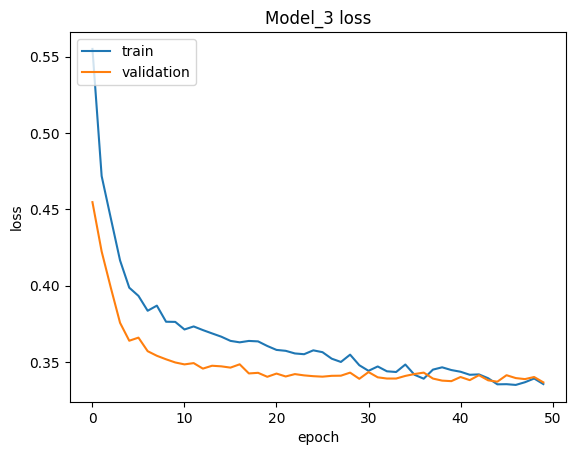

In [113]:
# Loss (Train & validation)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model_3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

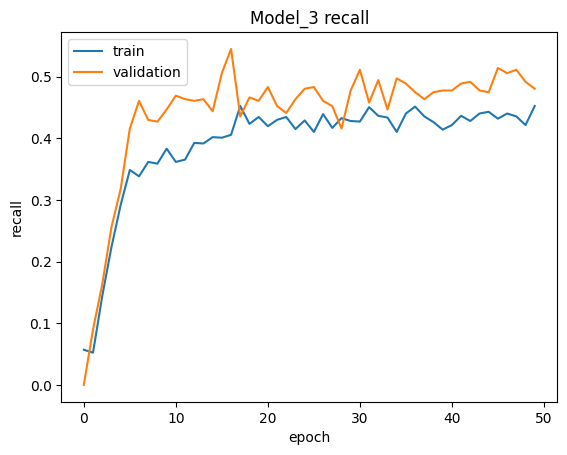

In [114]:
#Recall(Train & Validation)
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('Model_3 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [115]:
y_train_pred = model_3.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_train_pred

165/165 [==============================] - 1s 5ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [116]:
y_val_pred = model_3.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)
y_val_pred

55/55 [==============================] - 0s 5ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [117]:
model_3 = "Adam + relu + 2 Dropout"
train_metric_df.loc[model_3] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_3] = recall_score(y_val, y_val_pred)


In [118]:
cr_m3 = classification_report(y_train, y_train_pred)
print(cr_m3)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      4180
           1       0.83      0.47      0.60      1070

    accuracy                           0.87      5250
   macro avg       0.85      0.72      0.76      5250
weighted avg       0.87      0.87      0.86      5250



In [119]:
cr_m3val = classification_report(y_val, y_val_pred)
print(cr_m3val)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1394
           1       0.76      0.48      0.59       356

    accuracy                           0.86      1750
   macro avg       0.82      0.72      0.75      1750
weighted avg       0.85      0.86      0.85      1750



Train Recall: 0.4692


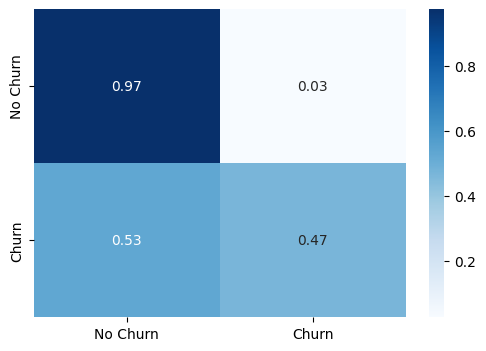

In [120]:
make_confusion_matrix(model_3, y_train, y_train_pred)

Train Recall: 0.4803


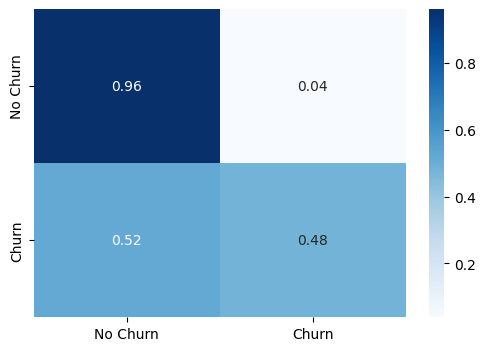

In [121]:
make_confusion_matrix(model_3, y_val, y_val_pred)

In [123]:
results.loc[3] = ['Model_3' ,1, 4, 1, 'relu + 2 Dropouts + sigmoid', 80, 32, 'Adam', 445.530, 0.3356, 0.4523, 0.3367, 0.4803]
results

,Model_name,#I/P layers,#hidden layer,#O/P layer,activation function,#epoch,#batch size,optimizer,time(secs),Train_loss,Train_recall,Val_loss,Val_recall
0,Model_0,1,1,1,sigmoid,10,32,SGD,82.006,0.4214,0.1561,0.4013,0.1440
1,Model_1,1,1,1,sigmoid,100,32,Adam,742.016,0.2408,0.6327,0.4080,0.6096
2,Model_2,1,3,1,relu + Dropout + sigmoid,50,32,Adam,380.108,0.3330,0.4850,0.3378,0.5197
3,Model_3,1,4,1,relu + 2 Dropouts + sigmoid,80,32,Adam,445.530,0.3356,0.4523,0.3367,0.4803


### Model_4 (Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer)

    Data Balancing with SMOTE:
    Utilizing the Synthetic Minority Over-sampling Technique (SMOTE) is effective for addressing class imbalance by generating synthetic samples for minority classes.

    Neural Network Architecture:
    Input Layer: 32 neurons with ReLU activation function.
    
    add Batchnormalization

    First Hidden Layer: 16 neurons with relu activation function.
    Second Hidden Layer: 8 neurons with relu activation function.
    add batchnormalization

    Output Layer: Single neuron with sigmoid activation function for binary classification.

    Optimizer and Training Parameters:
    Optimizer: SGD optimizer.
    Epochs: 50.
    Batch Size: 32

In [124]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [125]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print("After oversampling, the shape of train_X:", X_train_smote.shape)
print("After oversampling, the shape of train_y:", y_train_smote.shape)

After oversampling, the shape of train_X: (8360, 11)
After oversampling, the shape of train_y: (8360,)


In [126]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [129]:
# Intialize NN
model_4 = Sequential()
model_4.add(Dense(32, activation = 'relu', input_dim=X_train.shape[1])) # I/P layer with 64 neurons
model_4.add(Dense(16, activation = 'relu')) # Hidden layer with 16 neurons
model_4.add(BatchNormalization())
model_4.add(Dense(8, activation = 'relu')) # Hidden layer with 8 neurons
model_4.add(BatchNormalization())
model_4.add(Dense(1, activation = 'sigmoid')) # O/P layer with 1 neuron
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                384       
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_1 (Bat  (None, 8)                 32        
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                

In [130]:
# optimizer
optimizer= keras.optimizers.SGD()
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = [keras.metrics.Recall()], run_eagerly=True)

In [131]:
start= time.time()
history_4 = model_4.fit(X_train_smote, y_train_smote, epochs =50, batch_size =32, validation_data= (X_val, y_val))
end= time.time()
model_4.summary()

Epoch 1/50
262/262 [==============================] - 16s 60ms/step - loss: 0.6234 - recall: 0.5897 - val_loss: 0.5820 - val_recall: 0.6011
Epoch 2/50
262/262 [==============================] - 14s 54ms/step - loss: 0.5553 - recall: 0.6770 - val_loss: 0.5553 - val_recall: 0.7135
Epoch 3/50
262/262 [==============================] - 13s 51ms/step - loss: 0.5247 - recall: 0.7249 - val_loss: 0.5398 - val_recall: 0.7612
Epoch 4/50
262/262 [==============================] - 14s 53ms/step - loss: 0.4970 - recall: 0.7579 - val_loss: 0.4979 - val_recall: 0.7388
Epoch 5/50
262/262 [==============================] - 14s 53ms/step - loss: 0.4815 - recall: 0.7689 - val_loss: 0.4933 - val_recall: 0.7472
Epoch 6/50
262/262 [==============================] - 14s 52ms/step - loss: 0.4713 - recall: 0.7813 - val_loss: 0.4797 - val_recall: 0.7612
Epoch 7/50
262/262 [==============================] - 14s 52ms/step - loss: 0.4601 - recall: 0.7837 - val_loss: 0.4697 - val_recall: 0.7500
Epoch 8/50
262/262 [

In [132]:
print("Time taken in sec:", end - start)

Time taken in sec: 742.2656440734863


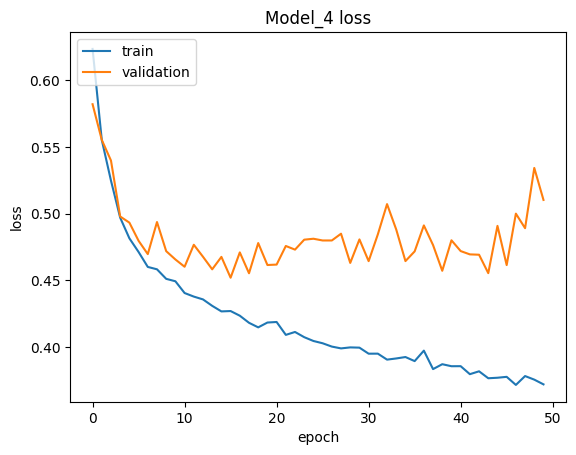

In [133]:
# Loss(train and validation)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('Model_4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

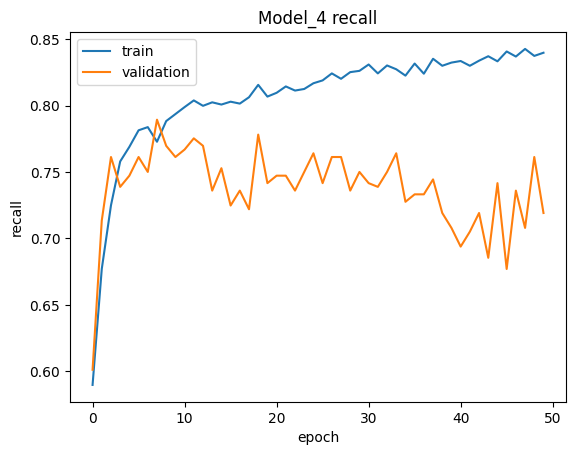

In [134]:
# Recall (train and validation)
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('Model_4 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [135]:
y_train_pred = model_4.predict(X_train_smote)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_train_pred

262/262 [==============================] - 2s 7ms/step


array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [136]:
y_val_pred = model_4.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)
y_val_pred

55/55 [==============================] - 0s 7ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [137]:
model_4 = "SMOTE + relu + relu + Batchnorm + SGD"
train_metric_df.loc[model_4] = recall_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_4] = recall_score(y_val, y_val_pred)

In [138]:
cr_m4 = classification_report(y_train_smote, y_train_pred)
print(cr_m4)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4180
           1       0.83      0.87      0.85      4180

    accuracy                           0.84      8360
   macro avg       0.85      0.84      0.84      8360
weighted avg       0.85      0.84      0.84      8360



In [139]:
cr_m4val = classification_report(y_val, y_val_pred)
print(cr_m4val)

              precision    recall  f1-score   support

           0       0.92      0.78      0.84      1394
           1       0.45      0.72      0.55       356

    accuracy                           0.76      1750
   macro avg       0.68      0.75      0.70      1750
weighted avg       0.82      0.76      0.78      1750



Train Recall: 0.8665


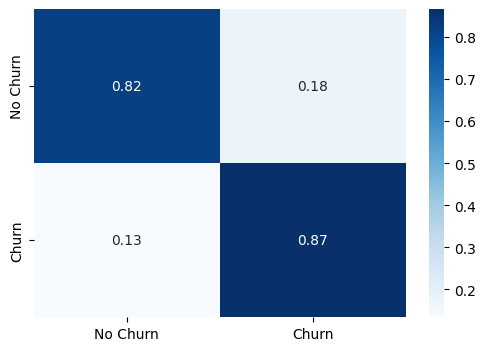

In [140]:
make_confusion_matrix(model_4, y_train_smote, y_train_pred)

Train Recall: 0.7191


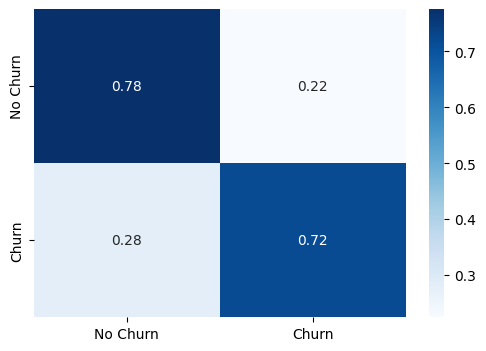

In [141]:
make_confusion_matrix(model_4, y_val, y_val_pred)

In [142]:
results.loc[4] = ['Model_4', 1, 4, 1, 'relu + relu + batchnorm + sigmoid', 50, 32, 'SGD', 742.265, 0.3721, 0.8397, 0.5103, 0.7191]
results

,Model_name,#I/P layers,#hidden layer,#O/P layer,activation function,#epoch,#batch size,optimizer,time(secs),Train_loss,Train_recall,Val_loss,Val_recall
0,Model_0,1,1,1,sigmoid,10,32,SGD,82.006,0.4214,0.1561,0.4013,0.1440
1,Model_1,1,1,1,sigmoid,100,32,Adam,742.016,0.2408,0.6327,0.4080,0.6096
2,Model_2,1,3,1,relu + Dropout + sigmoid,50,32,Adam,380.108,0.3330,0.4850,0.3378,0.5197
3,Model_3,1,4,1,relu + 2 Dropouts + sigmoid,80,32,Adam,445.530,0.3356,0.4523,0.3367,0.4803
4,Model_4,1,4,1,relu + relu + batchnorm + sigmoid,50,32,SGD,742.265,0.3721,0.8397,0.5103,0.7191


### Model_5 (Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer)

    Data Balancing with SMOTE:
    Utilizing the Synthetic Minority Over-sampling Technique (SMOTE) is effective for addressing class imbalance by generating synthetic samples for minority classes.

    Neural Network Architecture:
    Input Layer: 32 neurons with ReLU activation function.
    
    add Batchnormalization

    First Hidden Layer: 16 neurons with relu activation function.
    Second Hidden Layer: 8 neurons with relu activation function.
    add batchnormalization

    Output Layer: Single neuron with sigmoid activation function for binary classification.

    Optimizer and Training Parameters:
    Optimizer: Adam optimizer.
    Epochs: 80.
    Batch Size: 64

In [206]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [207]:
smt = SMOTE(random_state=42)
X_train_smot, y_train_smot= sm.fit_resample(X_train, y_train)
print("After oversampling, the shape of train_X:", X_train_smot.shape)
print("After oversampling, the shape of train_y:", y_train_smot.shape)

After oversampling, the shape of train_X: (8360, 11)
After oversampling, the shape of train_y: (8360,)


In [208]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [209]:
# Intialize NN
model_5 = Sequential()
model_5.add(Dense(32, activation = 'relu', input_dim=X_train.shape[1])) # I/P layer with 64 neurons
model_5.add(BatchNormalization())
model_5.add(Dense(16, activation = 'relu')) # Hidden layer with 16 neurons
model_5.add(BatchNormalization())
model_5.add(Dense(1, activation = 'sigmoid')) # O/P layer with 1 neuron
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1025 (4.0

In [210]:
# optimizer
optimizer= keras.optimizers.Adam()
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = [keras.metrics.Recall()], run_eagerly=True)

In [211]:
start= time.time()
history_5 = model_5.fit(X_train_smot, y_train_smot, epochs =50, batch_size =64, validation_data= (X_val, y_val))
end= time.time()
model_5.summary()

Epoch 1/50
131/131 [==============================] - 8s 58ms/step - loss: 0.6207 - recall: 0.6782 - val_loss: 0.5452 - val_recall: 0.5927
Epoch 2/50
131/131 [==============================] - 9s 66ms/step - loss: 0.5089 - recall: 0.7536 - val_loss: 0.4888 - val_recall: 0.7135
Epoch 3/50
131/131 [==============================] - 7s 56ms/step - loss: 0.4749 - recall: 0.7703 - val_loss: 0.4676 - val_recall: 0.7331
Epoch 4/50
131/131 [==============================] - 9s 65ms/step - loss: 0.4558 - recall: 0.7852 - val_loss: 0.4519 - val_recall: 0.7388
Epoch 5/50
131/131 [==============================] - 8s 64ms/step - loss: 0.4451 - recall: 0.7840 - val_loss: 0.4531 - val_recall: 0.7388
Epoch 6/50
131/131 [==============================] - 7s 56ms/step - loss: 0.4365 - recall: 0.7888 - val_loss: 0.4640 - val_recall: 0.7725
Epoch 7/50
131/131 [==============================] - 8s 64ms/step - loss: 0.4266 - recall: 0.7988 - val_loss: 0.4440 - val_recall: 0.7556
Epoch 8/50
131/131 [=======

In [212]:
print("Time taken in sec:", end - start)

Time taken in sec: 403.8390507698059


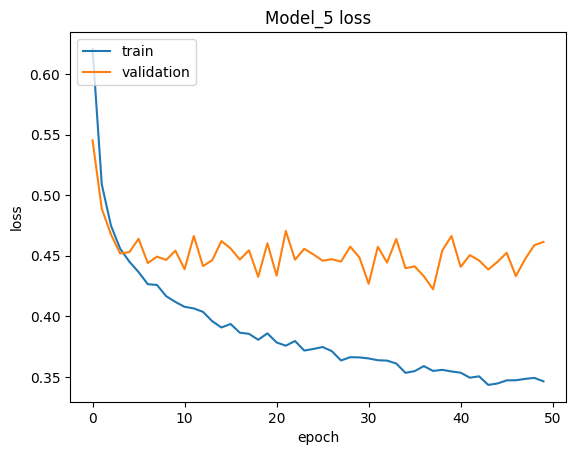

In [213]:
# loss(train and validation)
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('Model_5 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

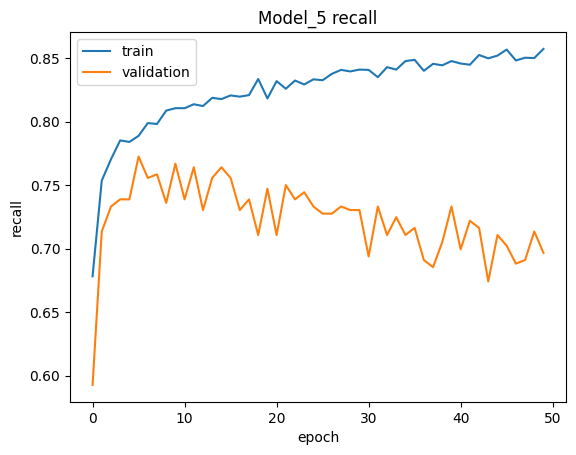

In [214]:
#recall(train and validation)
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('Model_5 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [215]:
y_train_pred = model_5.predict(X_train_smot)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_train_pred

262/262 [==============================] - 2s 7ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [216]:
y_val_pred = model_5.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)
y_val_pred

55/55 [==============================] - 0s 6ms/step


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [217]:
model_5 = "SMOTE + relu + tanh + Adam"
train_metric_df.loc[model_5] = recall_score(y_train_smot, y_train_pred)

In [218]:
cr_m5 = classification_report(y_train_smot, y_train_pred)
print(cr_m5)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4180
           1       0.86      0.87      0.87      4180

    accuracy                           0.86      8360
   macro avg       0.86      0.86      0.86      8360
weighted avg       0.86      0.86      0.86      8360



In [219]:
cr_m5val = classification_report(y_val, y_val_pred)
print(cr_m5val)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1394
           1       0.51      0.70      0.59       356

    accuracy                           0.80      1750
   macro avg       0.71      0.76      0.73      1750
weighted avg       0.83      0.80      0.81      1750



Train Recall: 0.8727


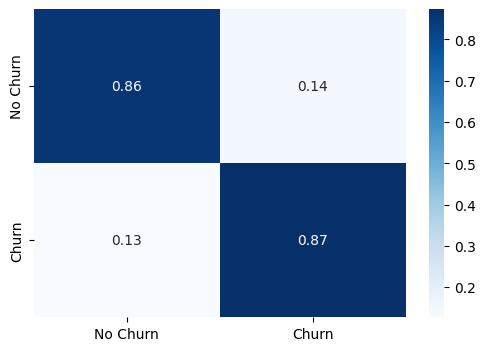

In [220]:
make_confusion_matrix(model_5, y_train_smot, y_train_pred)

Train Recall: 0.6966


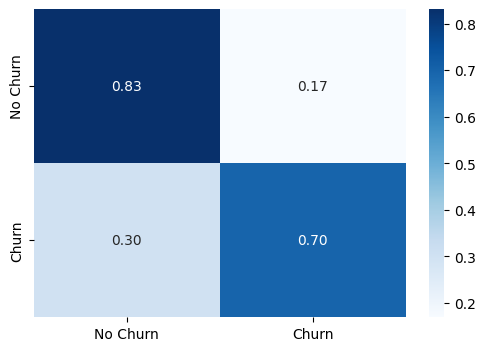

In [221]:
make_confusion_matrix(model_5, y_val, y_val_pred)

In [240]:
results.loc[5] = ['Model_5', 1, 1, 1, 'relu + relu + Batchnorm + sigmoid', 50, 32, 'Adam', 403.839, 0.3464, 0.8572, 0.4615, 0.6966]
results

,Model_name,#I/P layers,#hidden layer,#O/P layer,activation function,#epoch,#batch size,optimizer,time(secs),Train_loss,Train_recall,Val_loss,Val_recall
5,Model_5,1,1,1,relu + relu + Batchnorm + sigmoid,50,32,Adam,403.839,0.3464,0.8572,0.4615,0.6966
6,Model_6,1,2,1,relu + Batchnorm + dropout + sigmoid,80,32,Adam,20.716,0.4592,0.7830,0.4809,0.7636


### Model_6 (Neural Network with SMOTE (for Imbalanced data) + Adam Optimizer + dropout)

    Data Balancing with SMOTE:
    Utilizing the Synthetic Minority Over-sampling Technique (SMOTE) is effective for addressing class imbalance by generating synthetic samples for minority classes.

    Neural Network Architecture:
    Input Layer: 32 neurons with ReLU activation function.
    First Hidden Layer: 16 neurons with tanh activation function.
    Second Hidden Layer: 8 neurons with tanh activation function.
    Output Layer: Single neuron with sigmoid activation function for binary classification.
    
    Regularization with Dropout:
    Applying dropout to hidden layers helps prevent overfitting by randomly setting a fraction of input units to zero during training.

    Optimizer and Training Parameters:
    Optimizer: Adam optimizer is suitable for this setup.
    Epochs: 100.
    Batch Size: 32.

In [223]:
# clears current keras session, resetting all layers and models previously created and clearing up memory and resources
tf.keras.backend.clear_session()

In [224]:
st = SMOTE(random_state=42)
X_train_sot, y_train_sot= st.fit_resample(X_train, y_train)
print("After oversampling, the shape of train_X:", X_train_sot.shape)
print("After oversampling, the shape of train_y:", y_train_sot.shape)

After oversampling, the shape of train_X: (8360, 11)
After oversampling, the shape of train_y: (8360,)


In [225]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [226]:
# Initialize NN
model_6 = Sequential()
model_6.add(Dense(32, activation = 'relu', input_dim=X_train.shape[1])) # I/P layer with 64 neurons
model_6.add(BatchNormalization())
model_6.add(Dense(16, activation = 'relu')) # Hidden layer with 32 neurons
model_6.add(Dropout(0.3))# Dropout to prevent overfitting
model_6.add(BatchNormalization())
model_6.add(Dense(1, activation = 'sigmoid')) # O/P layer with 1 neuron
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [227]:
optimizer= keras.optimizers.Adam()
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = [keras.metrics.Recall()], run_eagerly=True)

In [228]:
start= time.time()
history_6 = model_6.fit(X_train_sot, y_train_sot, epochs =80, batch_size =32, validation_data= (X_val, y_val))
end= time.time()
model_6.summary()

Epoch 1/80
262/262 [==============================] - 18s 67ms/step - loss: 0.6724 - recall: 0.6282 - val_loss: 0.5154 - val_recall: 0.7163
Epoch 2/80
262/262 [==============================] - 17s 65ms/step - loss: 0.5475 - recall: 0.7218 - val_loss: 0.5019 - val_recall: 0.7921
Epoch 3/80
262/262 [==============================] - 17s 66ms/step - loss: 0.5097 - recall: 0.7488 - val_loss: 0.4837 - val_recall: 0.7865
Epoch 4/80
262/262 [==============================] - 18s 70ms/step - loss: 0.4953 - recall: 0.7586 - val_loss: 0.4536 - val_recall: 0.7612
Epoch 5/80
262/262 [==============================] - 17s 65ms/step - loss: 0.4872 - recall: 0.7581 - val_loss: 0.4777 - val_recall: 0.7781
Epoch 6/80
262/262 [==============================] - 17s 63ms/step - loss: 0.4847 - recall: 0.7713 - val_loss: 0.4601 - val_recall: 0.7612
Epoch 7/80
262/262 [==============================] - 17s 66ms/step - loss: 0.4712 - recall: 0.7780 - val_loss: 0.4615 - val_recall: 0.7612
Epoch 8/80
262/262 [

In [229]:
print("Time taken in sec:", end - start)

Time taken in sec: 1439.9376978874207


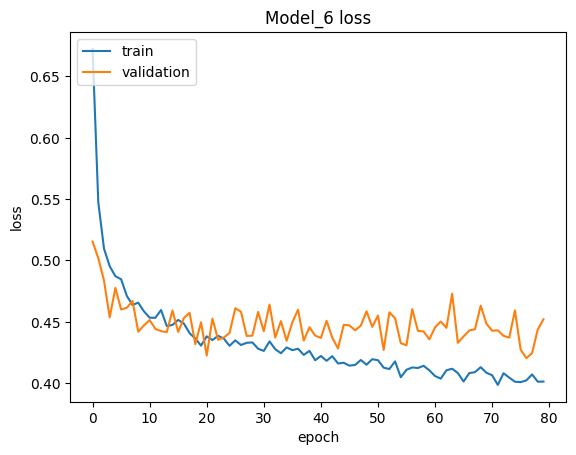

In [230]:
# Loss (Train and Validation)
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('Model_6 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

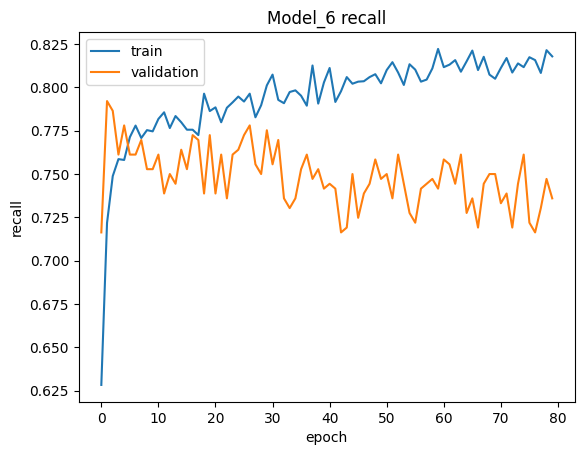

In [231]:
# Recall(Train and Validation)
plt.plot(history_6.history['recall'])
plt.plot(history_6.history['val_recall'])
plt.title('Model_6 recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show();

In [232]:
y_train_pred = model_6.predict(X_train_sot)
y_train_pred = (y_train_pred > 0.5).astype(int)
y_train_pred

262/262 [==============================] - 2s 8ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [233]:
y_val_pred = model_6.predict(X_val)
y_val_pred = (y_val_pred > 0.5).astype(int)
y_val_pred

55/55 [==============================] - 1s 10ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [234]:
model_6 = "SMOTE + relu + tanh + Adam + Dropout"
train_metric_df.loc[model_6] = recall_score(y_train_sot, y_train_pred)
valid_metric_df.loc[model_6] = recall_score(y_val, y_val_pred)

In [235]:
cr_m6 = classification_report(y_train_sot, y_train_pred)
print(cr_m6)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4180
           1       0.85      0.84      0.84      4180

    accuracy                           0.84      8360
   macro avg       0.84      0.84      0.84      8360
weighted avg       0.84      0.84      0.84      8360



In [236]:
cr_m6val = classification_report(y_val, y_val_pred)
print(cr_m6val)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1394
           1       0.50      0.74      0.59       356

    accuracy                           0.79      1750
   macro avg       0.71      0.77      0.73      1750
weighted avg       0.84      0.79      0.81      1750



Train Recall: 0.8411


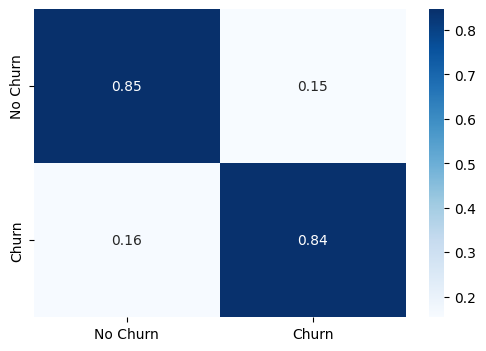

In [237]:
make_confusion_matrix(model_6, y_train_sot, y_train_pred)

Train Recall: 0.7360


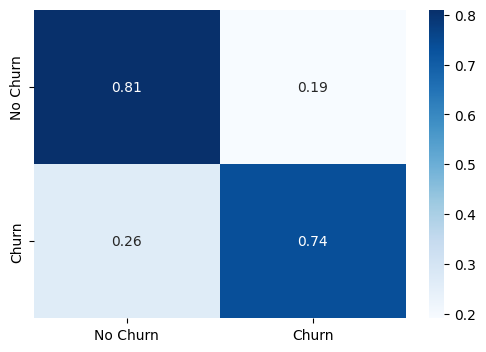

In [238]:
make_confusion_matrix(model_6, y_val, y_val_pred)

In [239]:
results.loc[6] = ['Model_6', 1, 2, 1, 'relu + Batchnorm + dropout + sigmoid', 80, 32, 'Adam', 20.716, 0.4592, 0.7830, 0.4809, 0.7636]
results

,Model_name,#I/P layers,#hidden layer,#O/P layer,activation function,#epoch,#batch size,optimizer,time(secs),Train_loss,Train_recall,Val_loss,Val_recall
5,Model_5,1,1,1,relu + relu + Batchnorm + sigmoid,50,32,Adam,1803.258,0.3194,0.869,0.5388,0.7630
6,Model_6,1,2,1,relu + Batchnorm + dropout + sigmoid,80,32,Adam,20.716,0.4592,0.783,0.4809,0.7636


## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
SMOTE + relu + tanh + Adam + Dropout,0.843062


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
SMOTE + relu + tanh + Adam + Dropout,0.696629


In [ ]:
train_metric_df - valid_metric_df

,recall
SMOTE + relu + tanh + Adam + Dropout,0.146433


AttributeError: 'str' object has no attribute 'predict'

In [ ]:
cr_final = classification_report(y_test, y_test_pred)
print(cr_final)

## Actionable Insights and Business Recommendations

###Actionable Insights :
According to above analysis, we can see following important changes that bank should do to perform reduce churns in future.

1. Tenure: Shorter tenure customers tend to churn more.
  Offer personalized onboarding, steadfastness programs, and early commitment techniques.

2. IsActiveMember: The percentage of inactive members to be churned.
  Cashbacks, more interest rates can attract more customers.
      
3. Gender: Mostly churned customers are females.
  Give incentives to female customers or more credit card benifits to female customers.

4. Age: Older customers are churning more than younger ones.
  Bank can offer more schemes for senior citizens.

5. Geography: Germany has maximum number of churns.
  Bank need to do more market analysis of Germany to increase customer numbers in that area. Open multiple branches can make more customers too.

Apart from these ...
6. Bank should improve the customer interaction services.

7. Imply Digital technologies like use fraud detection applications.

8. Educate customers on online bank apps and services.

###Business Recommendations:
1. Loyalty and Reward Programs : Offer better interest rates and fixed amount schemes.

2. Improve Banking Services: By using new techniques (AI based), bank should improve the online/digital system.

3. Use of Fraud detection apps.

4. Personalized customer services: assign a relationship manager to educate about online benifits and schemes.


      
    

<font size=6 color='blue'>Power Ahead</font>
___